# Rainfall Weather Forecasting

## Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change. Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

#### 1. Problem Statement:

a)  Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, median_absolute_error, max_error,accuracy_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor, AdaBoostRegressor

from sklearn.neighbors import KNeighborsRegressor


In [2]:
df=pd.read_csv("Rainfall.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   
6           W           50.0         SW  ...        49.0         19.0   
7           W           35.0        SSE  ...        48.0         19.0   
8         NNW           80.0         SE  ...        42.0          9.0   
9           W           28.0          S  ...        58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
6       1009.6       1008.2       1.0       NaN     18.1     24.6         No   
7       1013.4       1010.1       NaN       NaN     16.3     25.5         No   
8       1008.9       1003.6       NaN       NaN     18.3     30.2         No   
9       1007.0       1005.7       NaN       NaN     20.1     28.2        Yes   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 23 columns]

In [4]:
df.tail(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8415  2017-06-16    Uluru      5.2     24.3       0.0          NaN       NaN   
8416  2017-06-17    Uluru      6.4     23.4       0.0          NaN       NaN   
8417  2017-06-18    Uluru      8.0     20.7       0.0          NaN       NaN   
8418  2017-06-19    Uluru      7.4     20.6       0.0          NaN       NaN   
8419  2017-06-20    Uluru      3.5     21.8       0.0          NaN       NaN   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8415           E           24.0         SE  ...        53.0         24.0   
8416         ESE           31.0          S  ...        53.0         25.0   
8417         ESE           41.0         SE  ...        56.0         32.0   
8418           E           35.0        ESE  ...        63.0         33.0   
8419           E           31.0        ESE  ...        59.0         27.0   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8415       1023.8       1020.0       NaN       NaN     12.3     23.3   
8416       1025.8       1023.0       NaN       NaN     11.2     23.1   
8417       1028.1       1024.3       NaN       7.0     11.6     20.0   
8418       1027.2       1023.3       NaN       NaN     11.0     20.3   
8419       1024.7       1021.2       NaN       NaN      9.4     20.9   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8415         No            No  
8416         No            No  
8417         No            No  
8418         No            No  
8419         No            No  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[10 rows x 23 columns]

In [5]:
df.sample(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
1796  2014-03-14     Newcastle     17.8     29.0       0.0          NaN   
1892  2014-06-18     Newcastle     10.9     18.8       0.0          NaN   
7259  2011-11-20  PerthAirport     13.7     28.9       0.0          8.0   
5772  2010-12-20     Melbourne      9.9     19.3      22.2          3.8   
4301  2008-12-13    Wollongong     16.1     31.6      48.4          NaN   
1271  2010-03-09  CoffsHarbour     22.0     28.1       0.0          3.4   
505   2010-04-20        Albury     11.8     25.2       0.0          NaN   
7251  2011-11-12  PerthAirport     12.3     24.3       0.0          7.4   
6406  2011-11-03      Brisbane     17.1     28.2       0.0          6.2   
2310  2015-08-10     Newcastle      7.4     20.0       0.0          NaN   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
1796       NaN         NaN            NaN        NaN  ...        78.0   
1892       NaN         NaN            NaN        NaN  ...        84.0   
7259      13.1           S           50.0          E  ...        36.0   
5772       1.5          SW           52.0         SW  ...        61.0   
4301       NaN          NW           91.0          N  ...        84.0   
1271       9.1           N           26.0         NW  ...        75.0   
505        NaN         ENE           26.0        SSE  ...        79.0   
7251      12.7          SW           39.0        SSW  ...        53.0   
6406      12.3          SE           30.0          S  ...        54.0   
2310       NaN         NaN            NaN         NW  ...         NaN   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
1796         54.0          NaN          NaN       0.0       2.0     21.4   
1892         69.0          NaN          NaN       8.0       6.0     12.4   
7259         30.0       1022.0       1017.5       0.0       1.0     21.0   
5772         44.0       1003.9       1005.1       7.0       7.0     14.2   
4301         30.0        994.0        990.7       NaN       NaN     22.5   
1271         77.0       1014.4       1013.4       4.0       5.0     26.2   
505          49.0       1024.6       1020.1       1.0       1.0     16.4   
7251         45.0       1019.6       1017.3       6.0       5.0     20.5   
6406         62.0       1010.8       1007.6       1.0       1.0     26.0   
2310          NaN          NaN          NaN       1.0       NaN     11.5   

      Temp3pm  RainToday  RainTomorrow  
1796     28.5         No            No  
1892     18.0         No            No  
7259     27.6         No            No  
5772     17.9        Yes            No  
4301     31.2        Yes            No  
1271     26.1         No            No  
505      24.3         No            No  
7251     21.9         No            No  
6406     26.4         No            No  
2310      NaN         No            No  

[10 rows x 23 columns]

## Exploratory Data Analysis (EDA)

In [6]:
df.shape

(8425, 23)

We can see that our dataset is having 8425 rows and 23 columns

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

These are the columns name:-
'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RainToday', 'RainTomorrow'¶

In [8]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

There is 7 object columns and remaning are float

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
#Now We will convert date from object type to date type and then seperate day, month and year

df['Date']=pd.to_datetime(df['Date'])
df["Day"] = df['Date'].dt.day
df["Month"] = df['Date'].dt.month
df["Year"] = df['Date'].dt.year
df.drop("Date",axis=1,inplace=True)
df.sample(5)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
3284   Williamtown     21.0     41.4       0.0          NaN       NaN   
899         Albury      5.7     12.5       0.2          NaN       NaN   
971   CoffsHarbour      8.2     21.3       0.0          3.0       9.9   
6597      Brisbane     13.4     27.2       0.0          3.8      10.1   
915   CoffsHarbour     19.7     25.9       0.0          4.4       6.4   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
3284         WNW           63.0         NW        WNW  ...       1006.8   
899           NW           28.0        WNW        WNW  ...       1014.5   
971           SE           17.0        NaN        ESE  ...       1013.7   
6597           W           13.0         SW         NW  ...       1014.6   
915           SW           30.0         SW          S  ...       1016.5   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
3284       5.0       8.0     31.7     38.2         No           Yes   24   
899        8.0       8.0      7.9     11.1         No            No   18   
971        1.0       1.0     17.4     21.0         No            No   13   
6597       0.0       1.0     17.6     27.1         No            No   12   
915        6.0       5.0     21.2     24.6         No            No   18   

      Month  Year  
3284      1  2017  
899       6  2011  
971       5  2009  
6597      5  2012  
915       3  2009  

[5 rows x 25 columns]

#### Let us seperate the numerical and object datatypes:

In [11]:
object_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        object_datatype.append(i)
object_datatype

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [12]:
numerical_datatype=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_datatype.append(i)
numerical_datatype

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

### Checking the Duplicate values

In [13]:
# checking duplicates and removing it

print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 1663
After removing duplicates: 0


In [14]:
df.shape

(6762, 25)

### Checking Null values

In [15]:
df.isnull().sum()

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Day                 0
Month               0
Year                0
dtype: int64

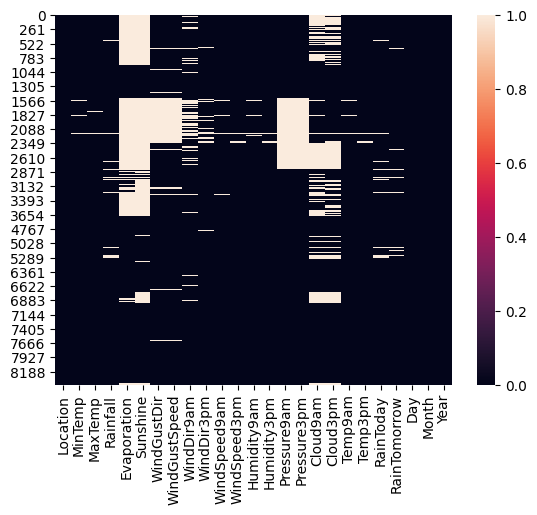

In [16]:
#plotting missing values in heatmap is there is present
sns.heatmap(df.isnull())
plt.show()

From the above observation we can see that almost all columns have null values, So we have to use imputation techniques for removing

In [17]:
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Fill missing values in numeric columns with the median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill missing values in categorical columns with the mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print("Remaining missing values:", df.isnull().sum().sum())


Remaining missing values: 0


In [18]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

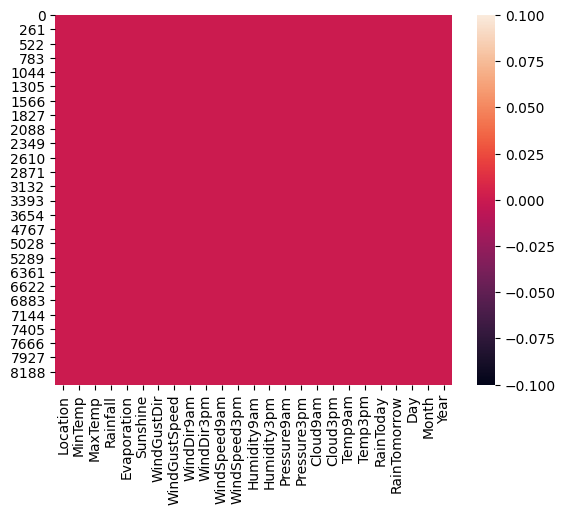

In [19]:
sns.heatmap(df.isnull())
plt.show()

Treated all null values

In [21]:
# Checking unique values of every columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Location':
['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']


Unique values in column 'MinTemp':
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.   3.9  3.4  0.  -1.5 -1.7
 -0.4  0.1  4.8  5.9  2.9 -0.6 -0.3 -1.   0.8 -0.1  1.3  3.3  6.5 -0.8
  1.9 

In [22]:
# Checking value_counts of very columns
for column in df.columns:
    unique_values = df[column].value_counts()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Location':
Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64


Unique values in column 'MinTemp':
MinTemp
13.2    128
12.0     57
14.8     53
12.7     53
10.8     52
       ... 
26.6      1
28.0      1
26.9      1
1.4       1
26.0      1
Name: count, Length: 285, dtype: int64


Unique values in column 'MaxTemp':
MaxTemp
23.5    99
19.0    66
19.8    62
22.3    54
23.8    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: count, Length: 331, dtype: int64


Unique values in column 'Rainfall':
Rainfall
0.0      4472
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: count, Length: 250, dtype: int64


Unique values 

### Statistical Data

In [23]:
df.describe().T

count         mean        std     min     25%     50%     75%  \
MinTemp        6762.0    13.110086   5.540674    -2.0     9.0    13.2    17.4   
MaxTemp        6762.0    24.093301   6.130367     8.2    19.6    23.5    28.4   
Rainfall       6762.0     2.723410  10.490138     0.0     0.0     0.0     0.8   
Evaporation    6762.0     4.998980   3.361770     0.0     4.0     4.6     5.0   
Sunshine       6762.0     8.421665   2.789228     0.0     8.8     9.0     9.2   
WindGustSpeed  6762.0    38.702159  13.393977     7.0    30.0    37.0    46.0   
WindSpeed9am   6762.0    12.765602   9.789075     0.0     6.0    11.0    19.0   
WindSpeed3pm   6762.0    17.562703   9.548883     0.0    11.0    17.0    24.0   
Humidity9am    6762.0    67.510500  17.182756    10.0    56.0    68.0    80.0   
Humidity3pm    6762.0    50.460515  18.498424     6.0    38.0    50.0    62.0   
Pressure9am    6762.0  1017.621222   6.027923   989.8  1014.2  1017.6  1020.9   
Pressure3pm    6762.0  1015.116060   5.967643   982.9  1011.5  1015.1  1018.4   
Cloud9am       6762.0     4.519817   2.492344     0.0     2.0     5.0     7.0   
Cloud3pm       6762.0     4.511979   2.343253     0.0     3.0     5.0     6.0   
Temp9am        6762.0    17.895830   5.722418     1.9    13.9    18.0    22.2   
Temp3pm        6762.0    22.700281   5.972262     7.3    18.4    22.1    26.8   
Day            6762.0    15.737208   8.793898     1.0     8.0    16.0    23.0   
Month          6762.0     6.462141   3.377471     1.0     4.0     6.0     9.0   
Year           6762.0  2012.052203   2.301057  2008.0  2010.0  2012.0  2014.0   

                  max  
MinTemp          28.5  
MaxTemp          45.5  
Rainfall        371.0  
Evaporation     145.0  
Sunshine         13.9  
WindGustSpeed   107.0  
WindSpeed9am     63.0  
WindSpeed3pm     83.0  
Humidity9am     100.0  
Humidity3pm      99.0  
Pressure9am    1039.0  
Pressure3pm    1036.0  
Cloud9am          8.0  
Cloud3pm          8.0  
Temp9am          39.4  
Temp3pm          44.1  
Day              31.0  
Month            12.0  
Year           2017.0

Count of all columns is now equal i.e 6762.

We can see that there are some negative values also

### Checking Skewness

In [25]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int32
Month              int32
Year               int32
dtype: object

In [27]:
skewness = df.select_dtypes(include=['int32', 'float64']).skew()
print("Skewness of Numerical Columns:\n", skewness)

Skewness of Numerical Columns:
 MinTemp          -0.084215
MaxTemp           0.330020
Rainfall         13.637400
Evaporation      13.603792
Sunshine         -1.378286
WindGustSpeed     0.838665
WindSpeed9am      0.961630
WindSpeed3pm      0.552405
Humidity9am      -0.256862
Humidity3pm       0.151933
Pressure9am       0.024619
Pressure3pm       0.044933
Cloud9am         -0.426084
Cloud3pm         -0.396334
Temp9am          -0.047627
Temp3pm           0.352174
Day               0.006240
Month             0.021988
Year              0.354481
dtype: float64


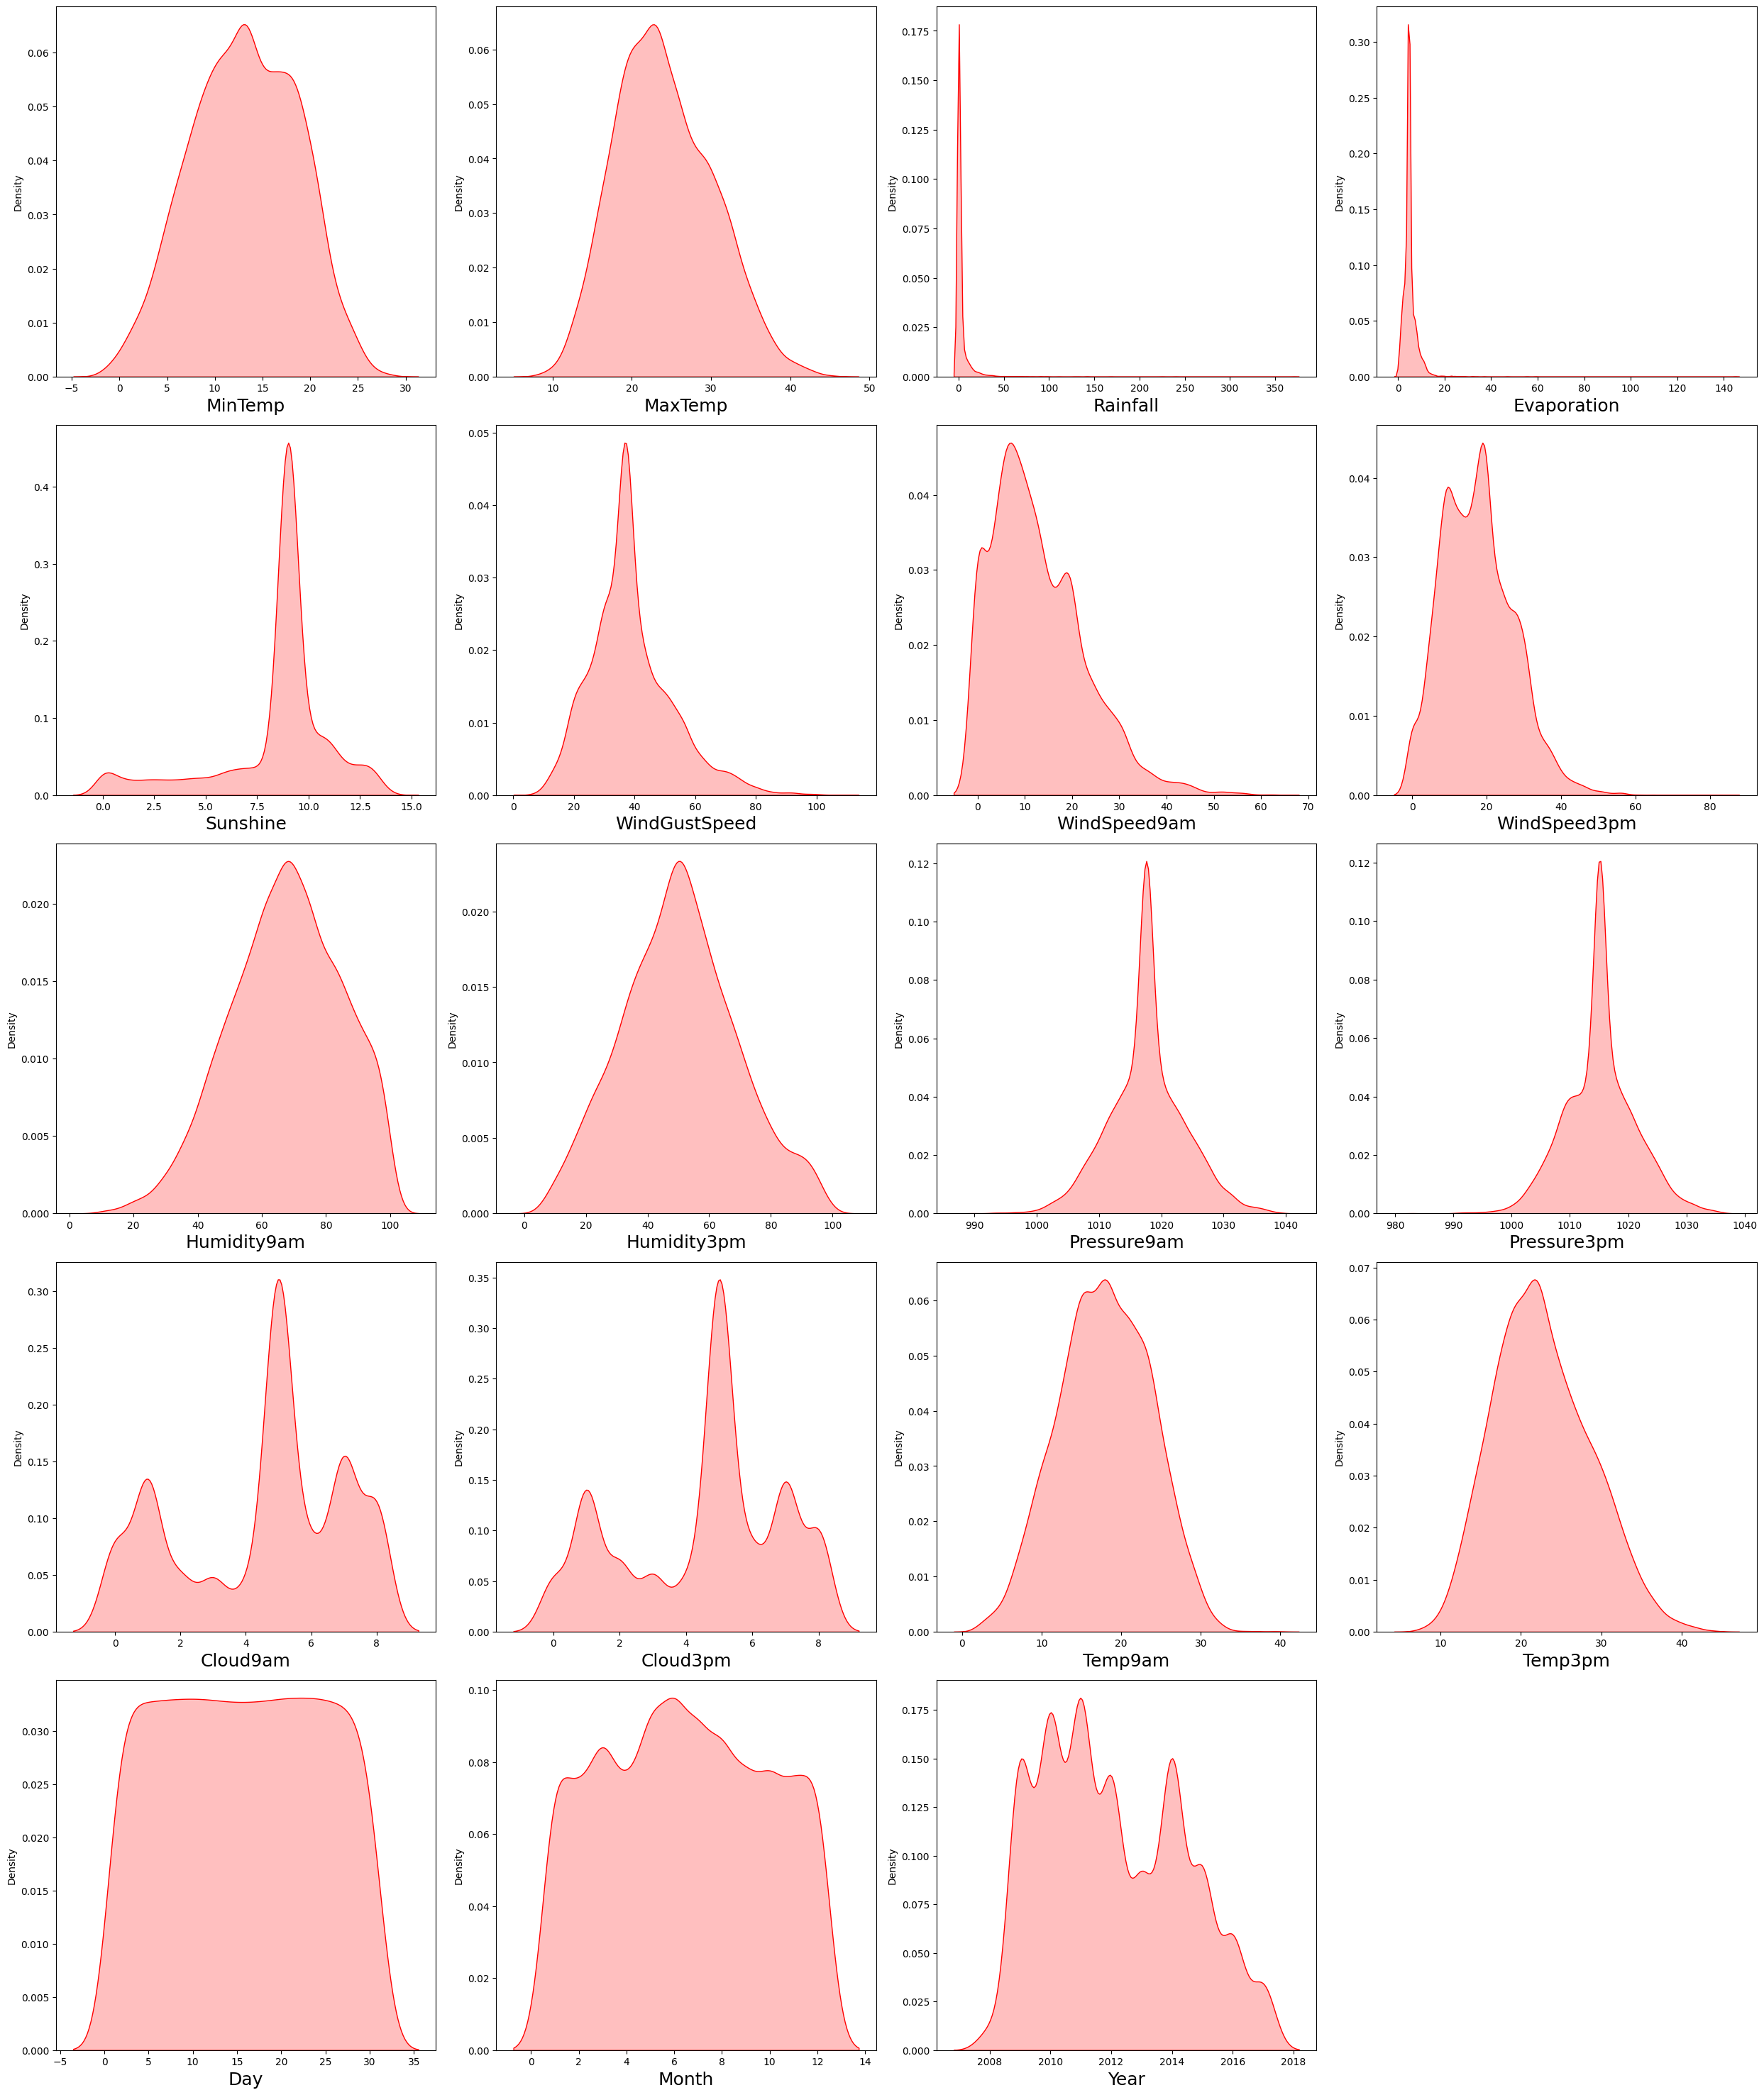

In [28]:
numerical_cols = df.select_dtypes(include=['int32', 'float64']).columns

plt.figure(figsize=(25, 35), facecolor='white')

plotnumber = 1
for column in numerical_cols:
    if plotnumber <= 23:
        ax = plt.subplot(6, 4, plotnumber)
        sns.distplot(df[column], color="red", hist=False, kde_kws={"shade": True})
        plt.xlabel(column, fontsize=18)
    plotnumber += 1

plt.tight_layout()
plt.show()

We found skewness in these columns:- 'Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm'

### Checking Outliers

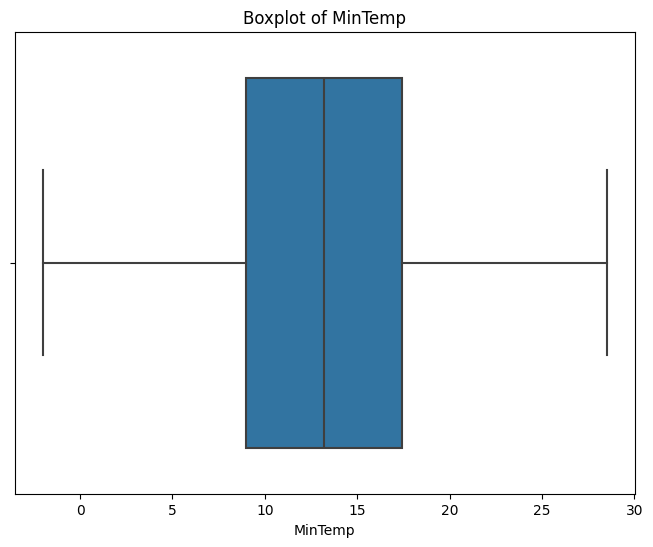

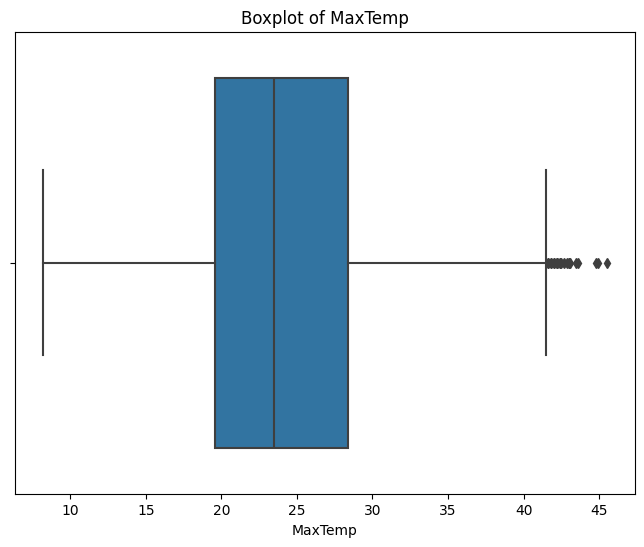

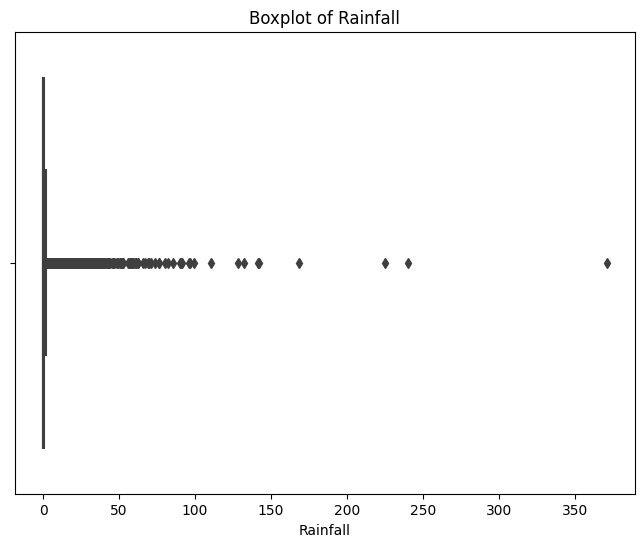

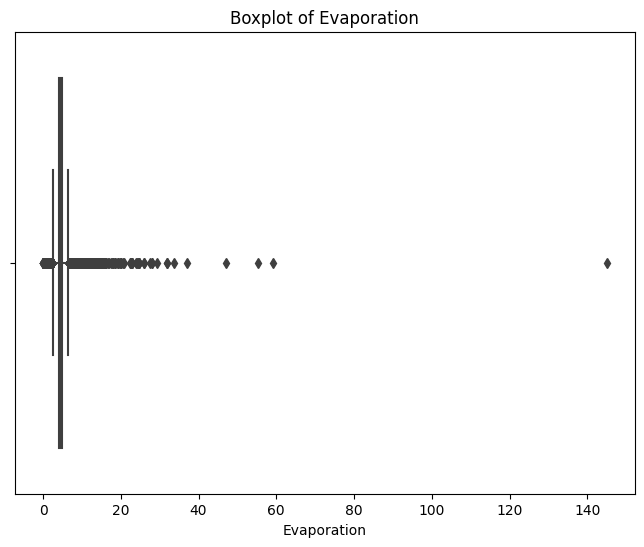

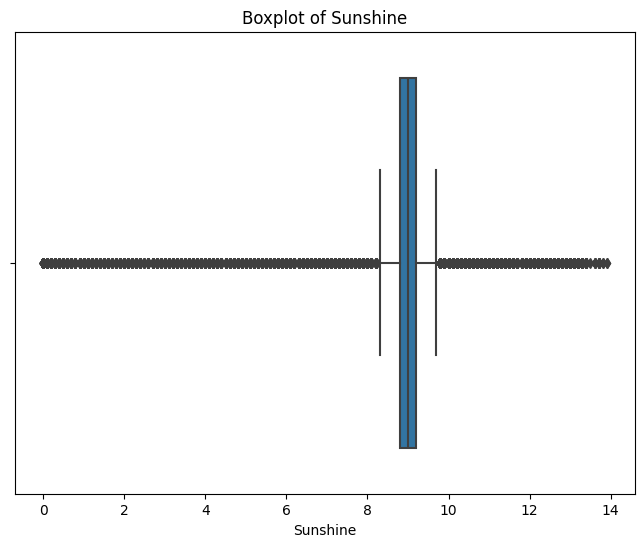

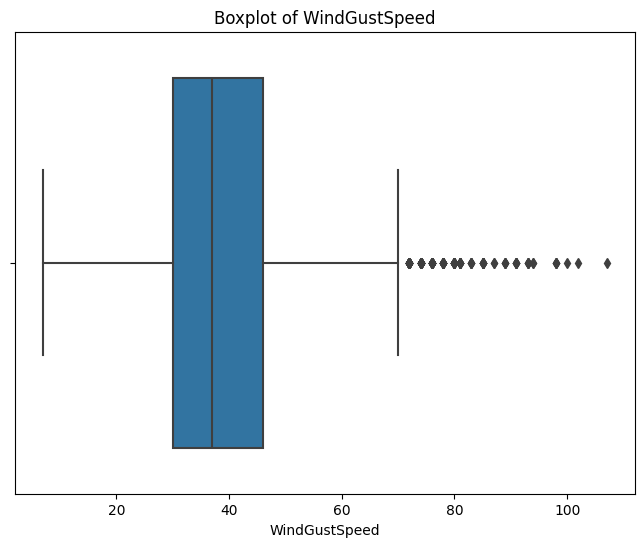

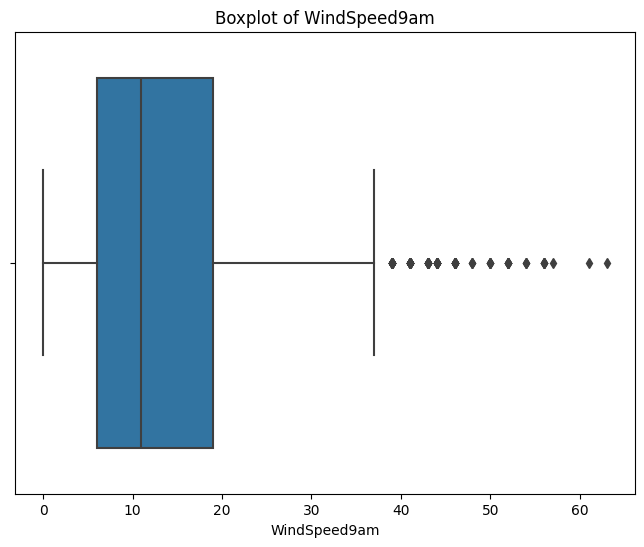

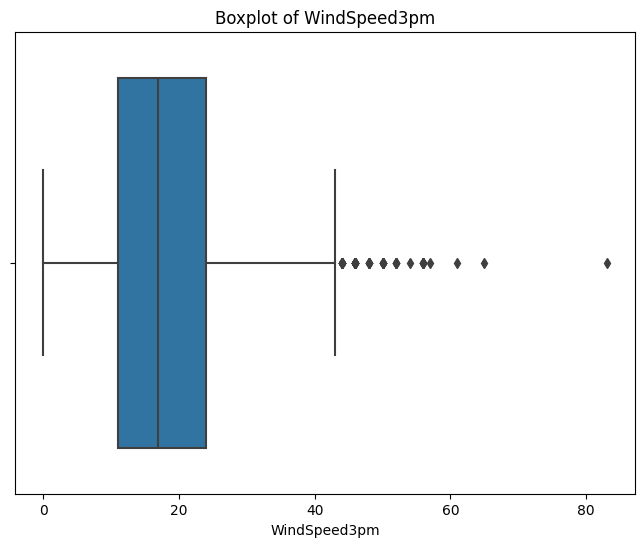

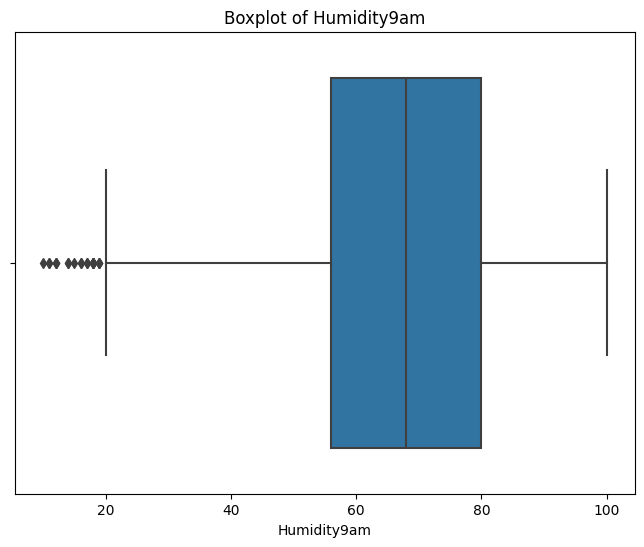

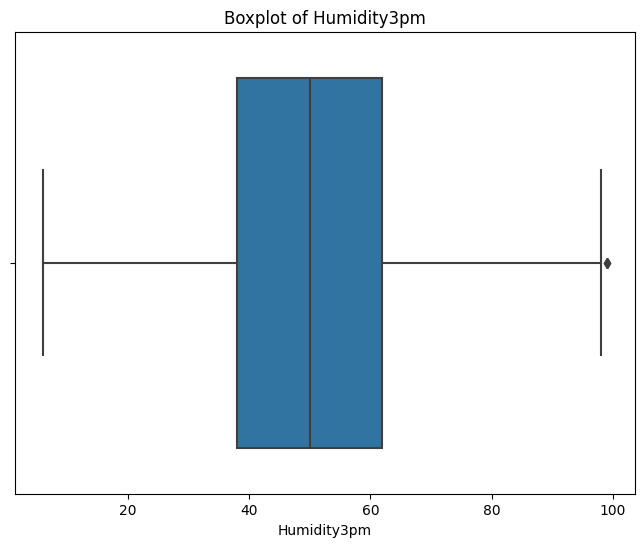

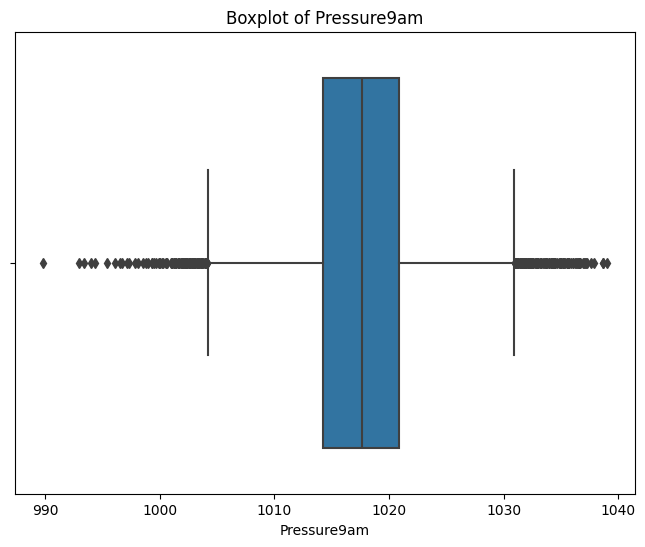

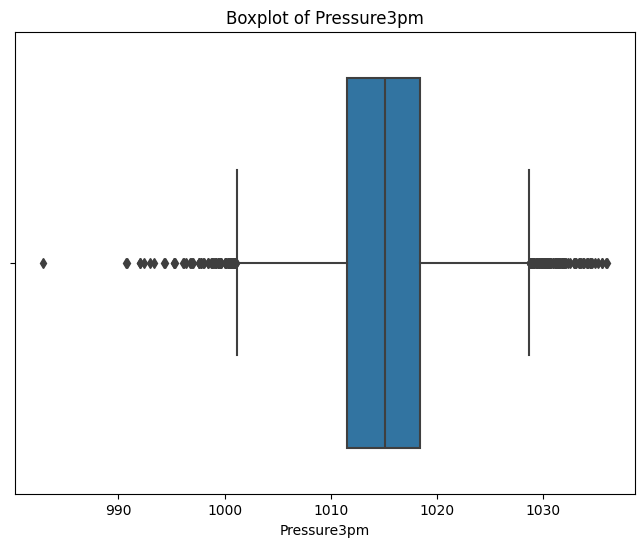

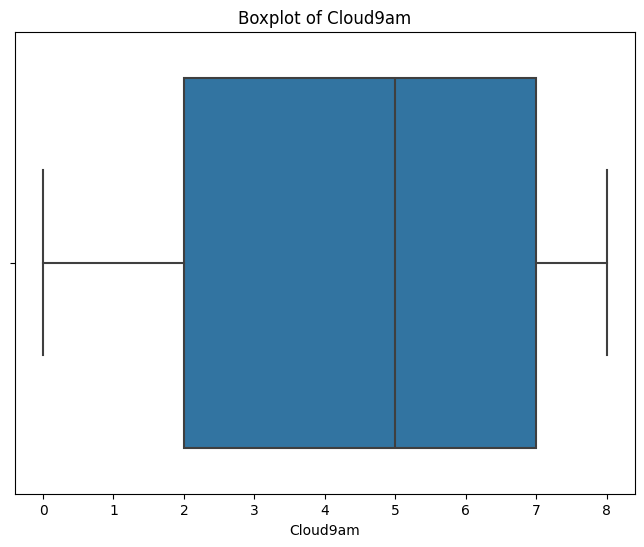

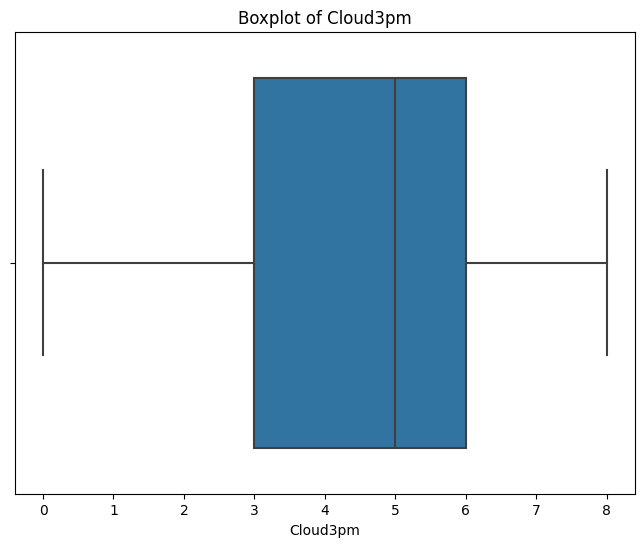

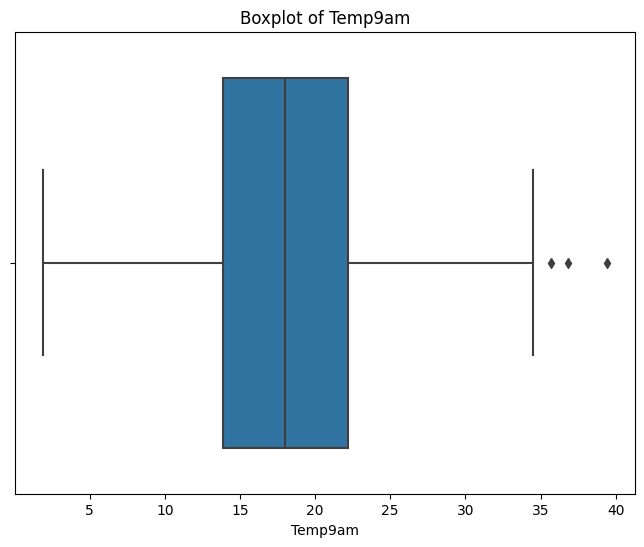

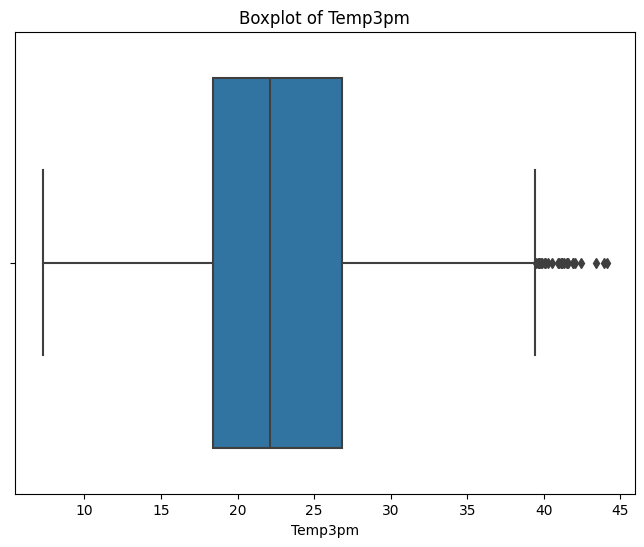

In [29]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

#### we have some outliers in these columns Outliers are present in below columns:

1. MaxTemp
2. Rainfall
3. Evaporation
4. WindGustSpeed
5. WindSpeed9am
6. WindSpeed3pm
7. Humidity9am
8. Pressure9am
9. Pressure3pm
10. Temp9am
11. Temp3pm
12. Sunshine

In [30]:
# Removing Outliers using z-score
from scipy.stats import zscore

features=df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

z=np.abs(zscore(features))
z  

MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     0.194668  0.202435      0.11869  0.207361       0.395568      0.739082   
1     0.164227  0.259635      0.11869  0.207361       0.395568      0.895514   
2     0.262108  0.259635      0.11869  0.207361       0.544900      0.636920   
3     0.637317  0.259635      0.11869  0.207361       1.097751      0.180378   
4     1.338795  0.164301      0.11869  0.207361       0.171570      0.589027   
...        ...       ...          ...       ...            ...           ...   
8420  0.113101  0.259635      0.11869  0.207361       0.575089      0.023947   
8421  0.196854  0.259635      0.11869  0.207361       1.247082      0.023947   
8422  0.457869  0.259635      0.11869  0.207361       0.127093      0.384702   
8423  0.474183  0.259635      0.11869  0.207361       0.799087      0.023947   
8424  0.096788  0.259635      0.11869  0.207361       0.127093      0.432596   

      WindSpeed3pm  Humidity9am  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0         0.674191     0.203097     1.645999     1.343353  0.174035  0.150755  
1         0.464727     1.368362     1.164869     1.226045  0.121606  0.267878  
2         0.883655     1.717576     1.662590     1.075221  0.542498  0.083680  
3         0.896789     1.310160     0.003521     0.388132  0.035682  0.636275  
4         0.255263     0.843321     1.131688     1.527694  0.016748  1.172125  
...            ...          ...          ...          ...       ...       ...  
8420      0.687325     0.960947     1.157828     0.868739  1.362432  0.050283  
8421      0.896789     0.669936     0.975330     0.667639  1.222621  0.301369  
8422      0.896789     0.844543     0.560563     0.282199  0.942998  0.569294  
8423      1.106253     0.960947     0.295112     0.231924  0.488611  0.552548  
8424      0.058933     0.320723     0.427837     0.466540  0.506087  0.301463  

[6762 rows x 12 columns]

In [31]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      Albury     13.4     22.9       0.6          4.6       9.0           W   
1      Albury      7.4     25.1       0.0          4.6       9.0         WNW   
2      Albury     12.9     25.7       0.0          4.6       9.0         WSW   
3      Albury      9.2     28.0       0.0          4.6       9.0          NE   
4      Albury     17.5     32.3       1.0          4.6       9.0           W   
...       ...      ...      ...       ...          ...       ...         ...   
8420    Uluru      2.8     23.4       0.0          4.6       9.0           E   
8421    Uluru      3.6     25.3       0.0          4.6       9.0         NNW   
8422    Uluru      5.4     26.9       0.0          4.6       9.0           N   
8423    Uluru      7.8     27.0       0.0          4.6       9.0          SE   
8424    Uluru     14.9     23.5       0.0          4.6       9.0           E   

      WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
0              44.0          W        WNW  ...       1007.1       8.0   
1              44.0        NNW        WSW  ...       1007.8       5.0   
2              46.0          W        WSW  ...       1008.7       5.0   
3              24.0         SE          E  ...       1012.8       5.0   
4              41.0        ENE         NW  ...       1006.0       7.0   
...             ...        ...        ...  ...          ...       ...   
8420           31.0         SE        ENE  ...       1020.3       5.0   
8421           22.0         SE          N  ...       1019.1       5.0   
8422           37.0         SE        WNW  ...       1016.8       5.0   
8423           28.0        SSE          N  ...       1016.5       3.0   
8424           37.0        ESE        ESE  ...       1017.9       8.0   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0          5.0     16.9     21.8         No            No    1     12  2008  
1          5.0     17.2     24.3         No            No    2     12  2008  
2          2.0     21.0     23.2         No            No    3     12  2008  
3          5.0     18.1     26.5         No            No    4     12  2008  
4          8.0     17.8     29.7         No            No    5     12  2008  
...        ...      ...      ...        ...           ...  ...    ...   ...  
8420       5.0     10.1     22.4         No            No   21      6  2017  
8421       5.0     10.9     24.5         No            No   22      6  2017  
8422       5.0     12.5     26.1         No            No   23      6  2017  
8423       2.0     15.1     26.0         No            No   24      6  2017  
8424       8.0     15.0     20.9         No            No   25      6  2017  

[6305 rows x 25 columns]

In [32]:
data_loss = (len(df) - len(df_new)) / len(df) * 100
print(f"Data loss after treating outliers: {data_loss:.2f}%")

Data loss after treating outliers: 6.76%


In [33]:
df_new=df

In [34]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.6       9.0           W   
1   Albury      7.4     25.1       0.0          4.6       9.0         WNW   
2   Albury     12.9     25.7       0.0          4.6       9.0         WSW   
3   Albury      9.2     28.0       0.0          4.6       9.0          NE   
4   Albury     17.5     32.3       1.0          4.6       9.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       5.0   
1           44.0        NNW        WSW  ...       1007.8       5.0       5.0   
2           46.0          W        WSW  ...       1008.7       5.0       2.0   
3           24.0         SE          E  ...       1012.8       5.0       5.0   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

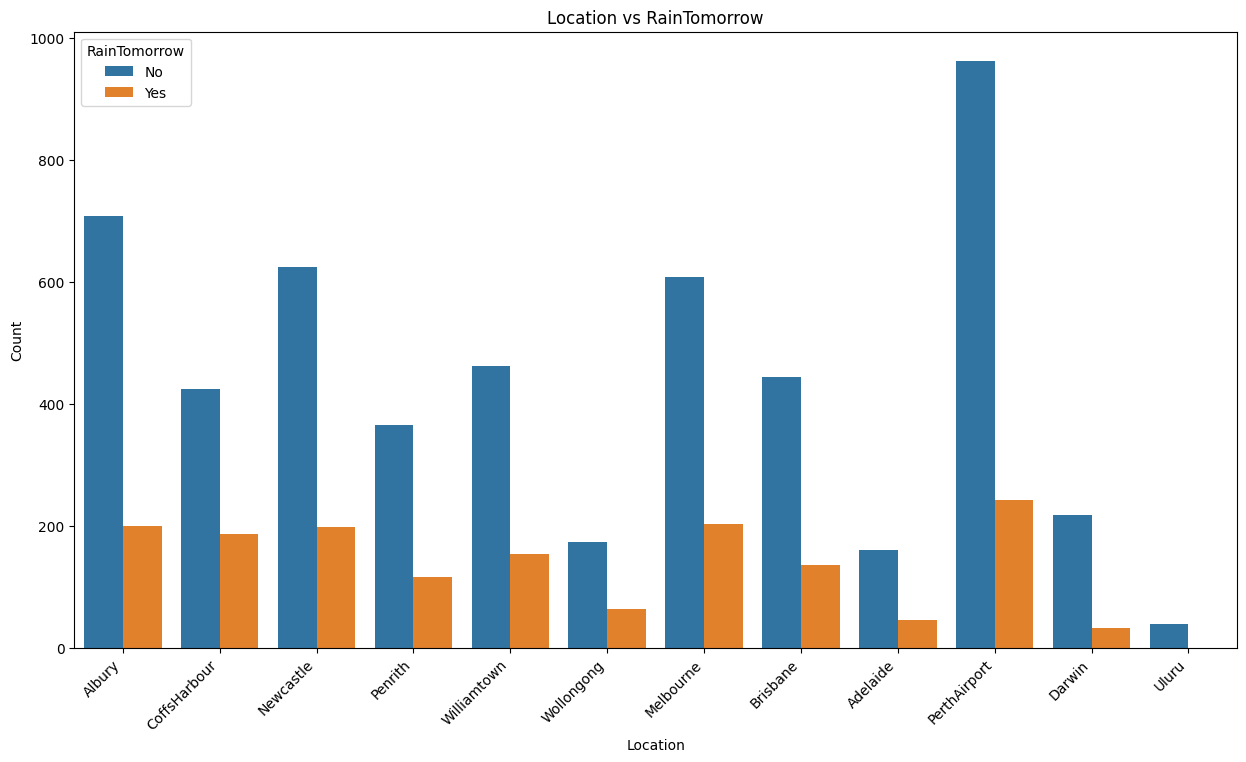

In [35]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Location', hue='RainTomorrow', data=df)
plt.title('Location vs RainTomorrow')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


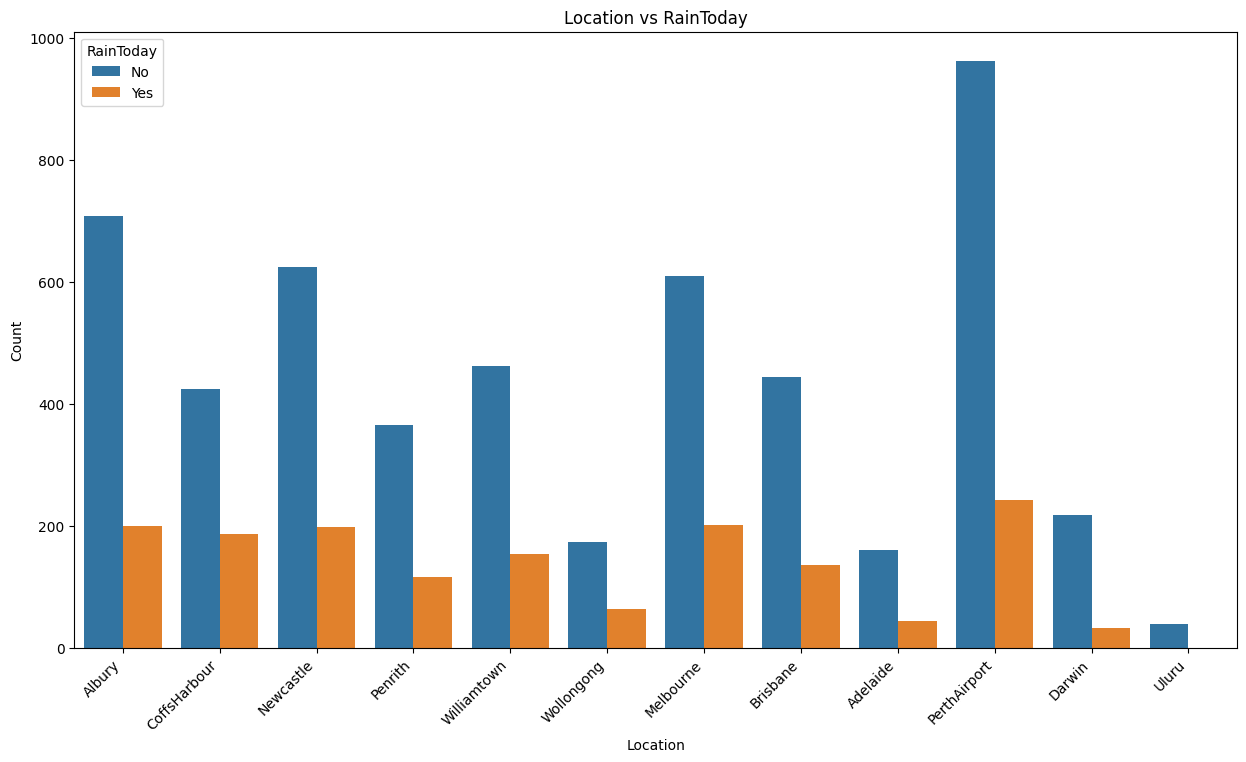

In [36]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Location', hue='RainToday', data=df)
plt.title('Location vs RainToday')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

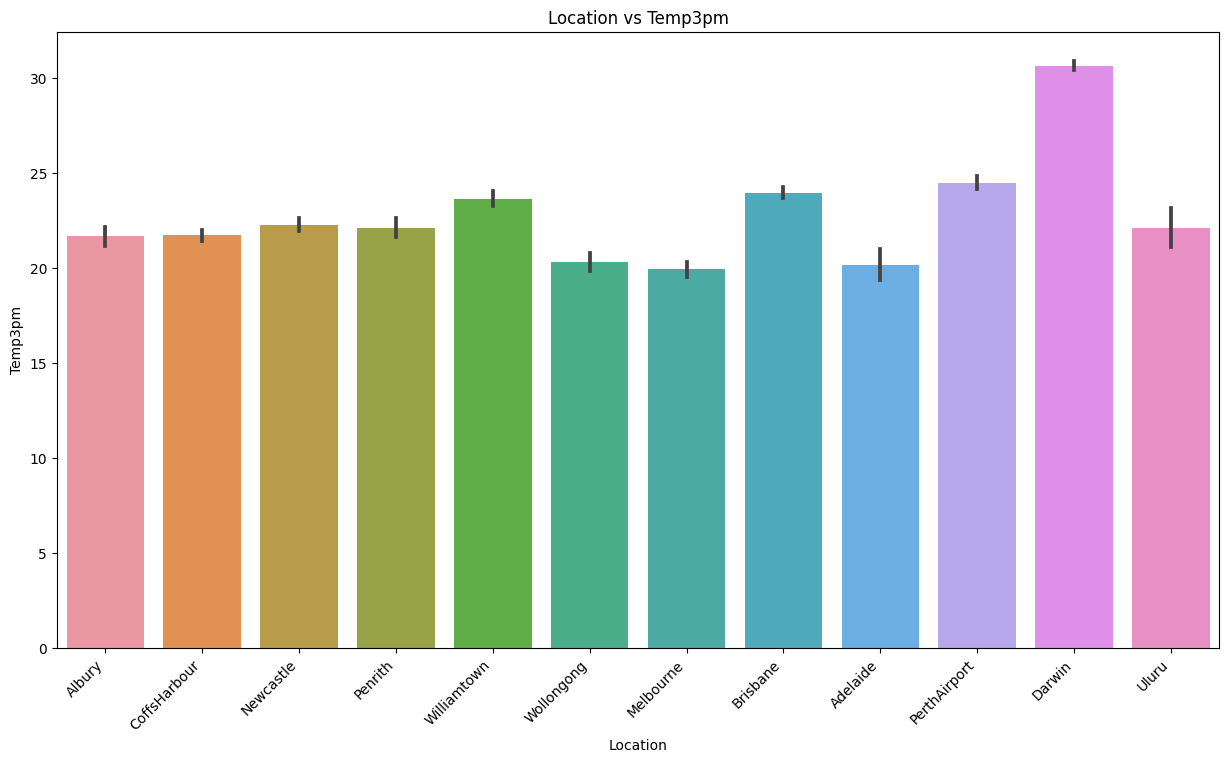

In [37]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Temp3pm', data=df)
plt.title('Location vs Temp3pm')
plt.xlabel('Location')
plt.ylabel('Temp3pm')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [38]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

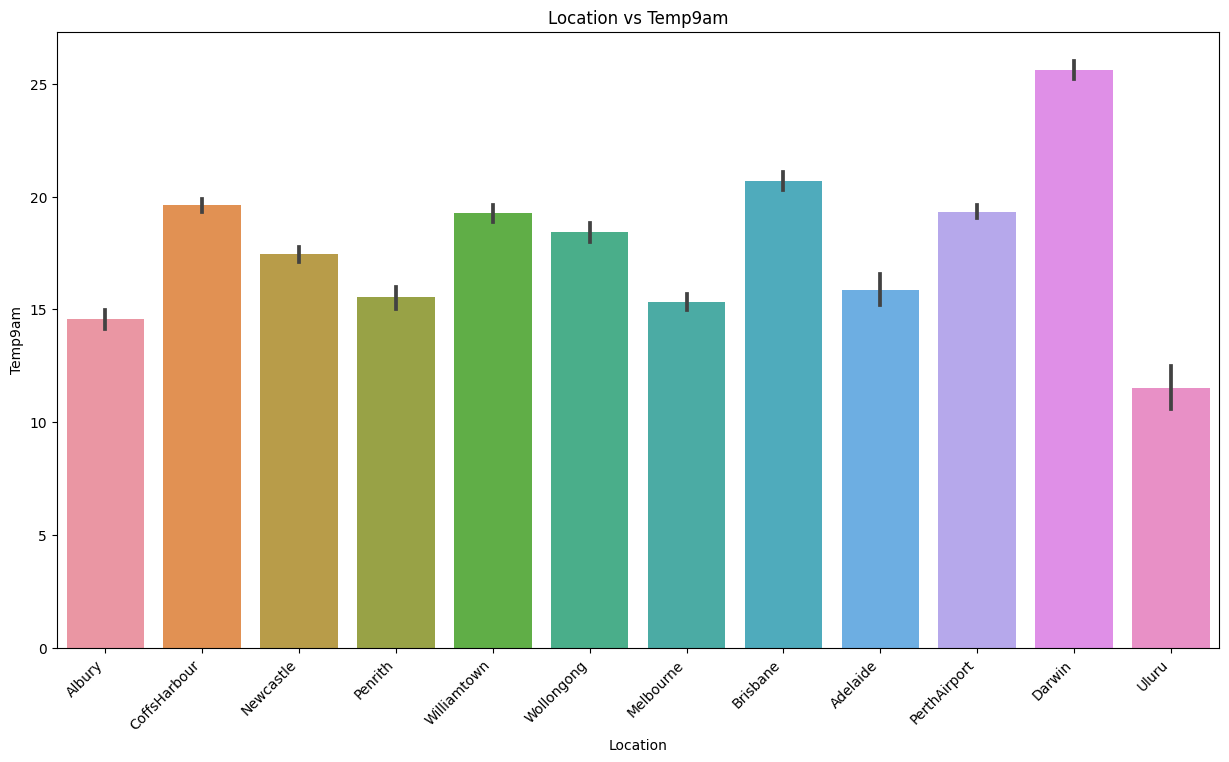

In [39]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Temp9am', data=df)
plt.title('Location vs Temp9am')
plt.xlabel('Location')
plt.ylabel('Temp9am')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

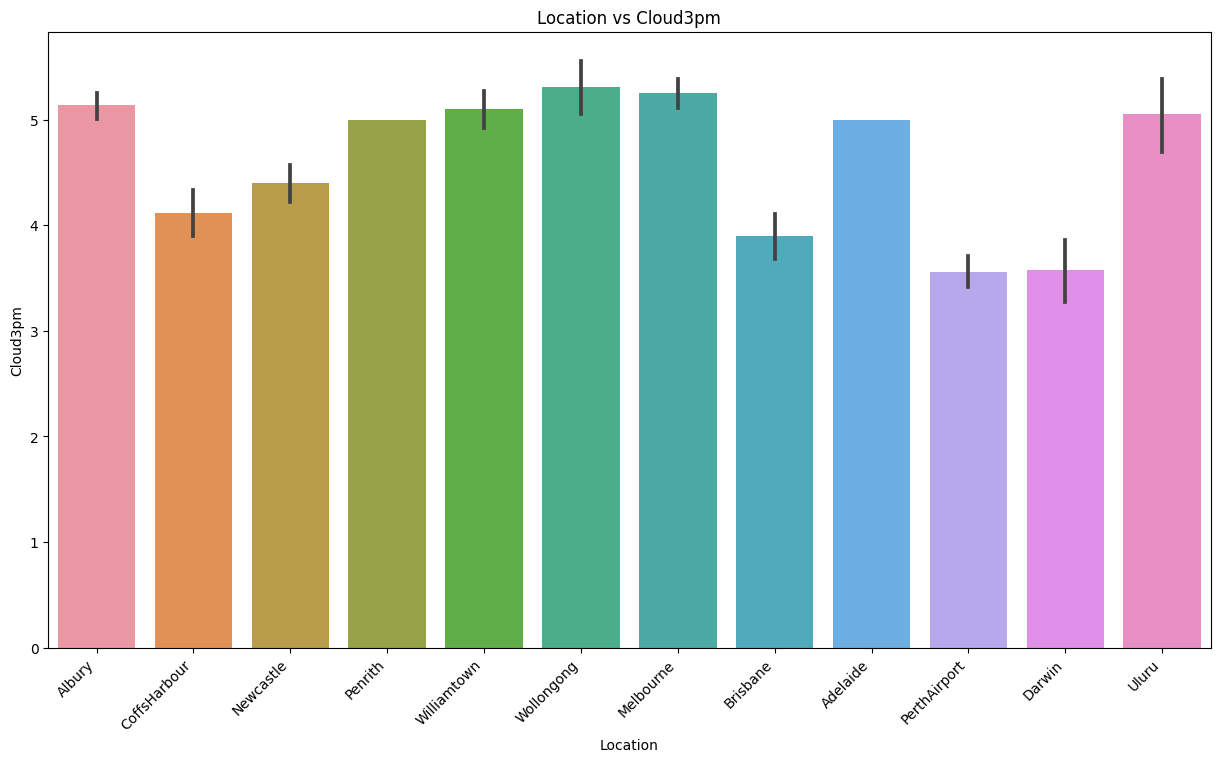

In [40]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Cloud3pm', data=df)
plt.title('Location vs Cloud3pm')
plt.xlabel('Location')
plt.ylabel('Cloud3pm')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

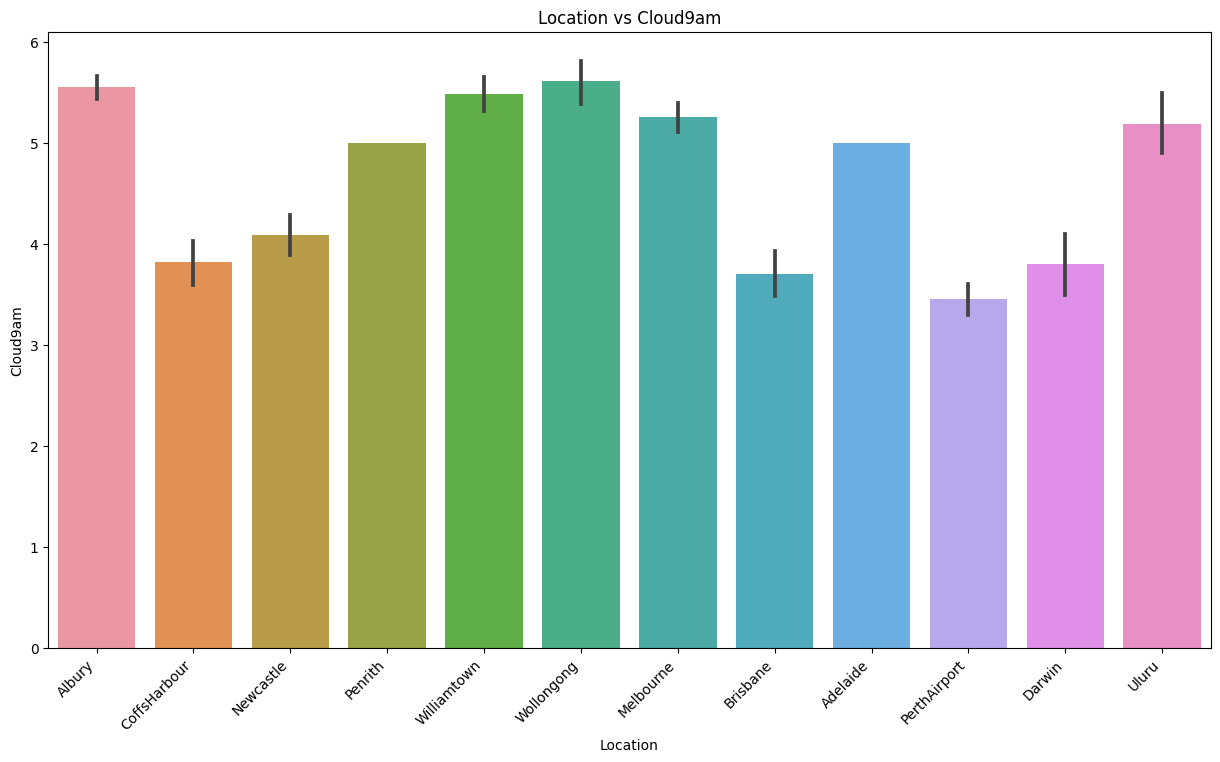

In [41]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Cloud9am', data=df)
plt.title('Location vs Cloud9am')
plt.xlabel('Location')
plt.ylabel('Cloud9am')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

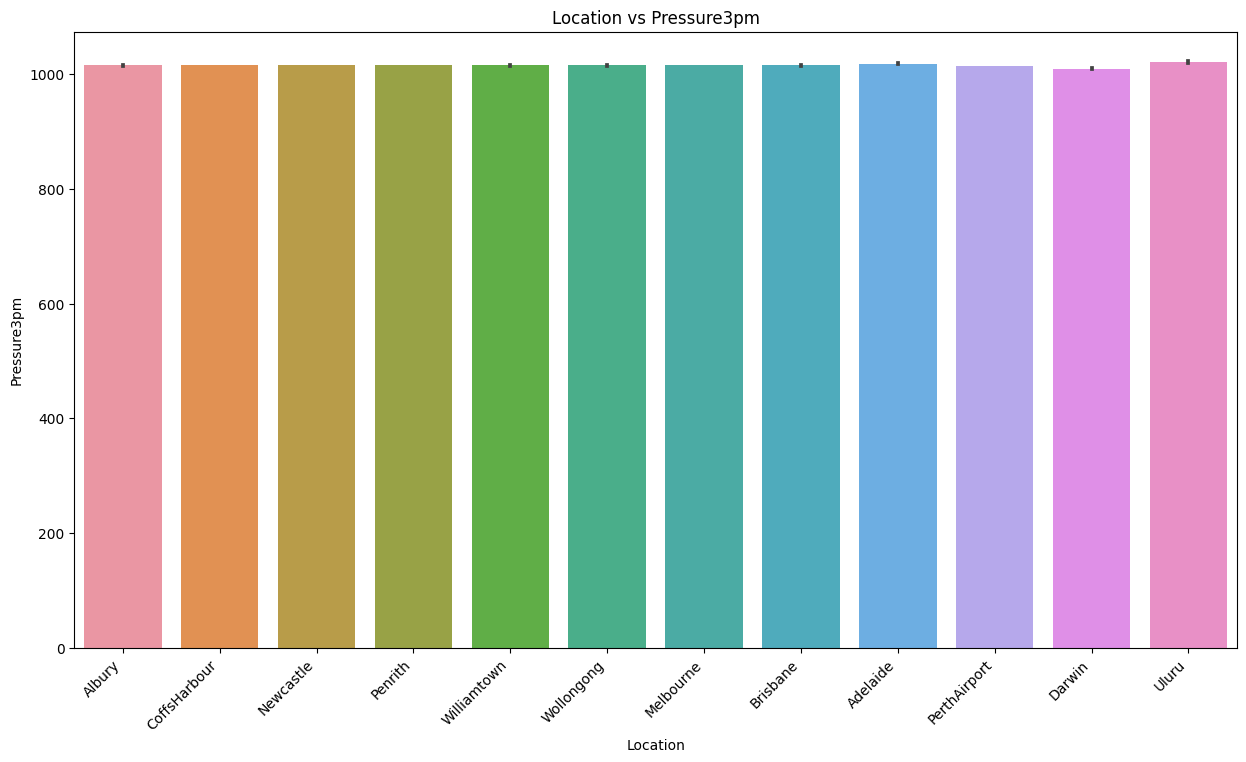

In [42]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Pressure3pm', data=df)
plt.title('Location vs Pressure3pm')
plt.xlabel('Location')
plt.ylabel('Pressure3pm')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

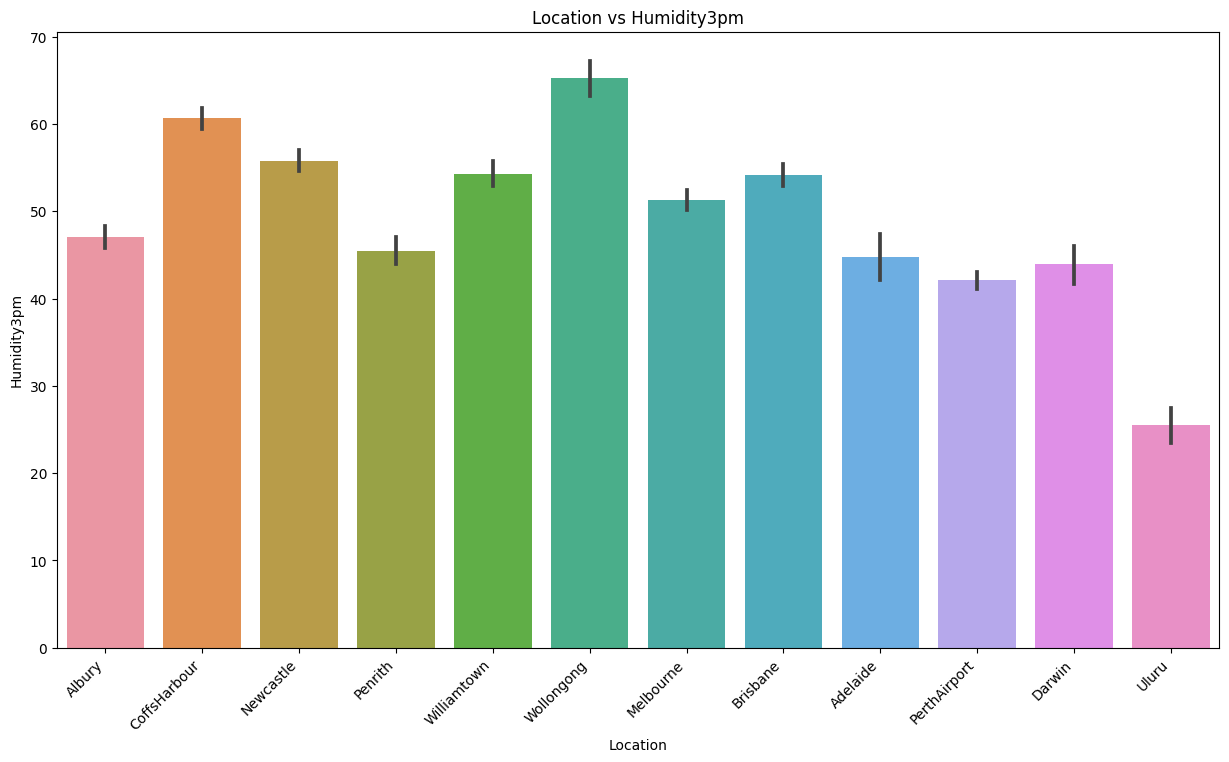

In [43]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Humidity3pm', data=df)
plt.title('Location vs Humidity3pm')
plt.xlabel('Location')
plt.ylabel('Humidity3pm')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

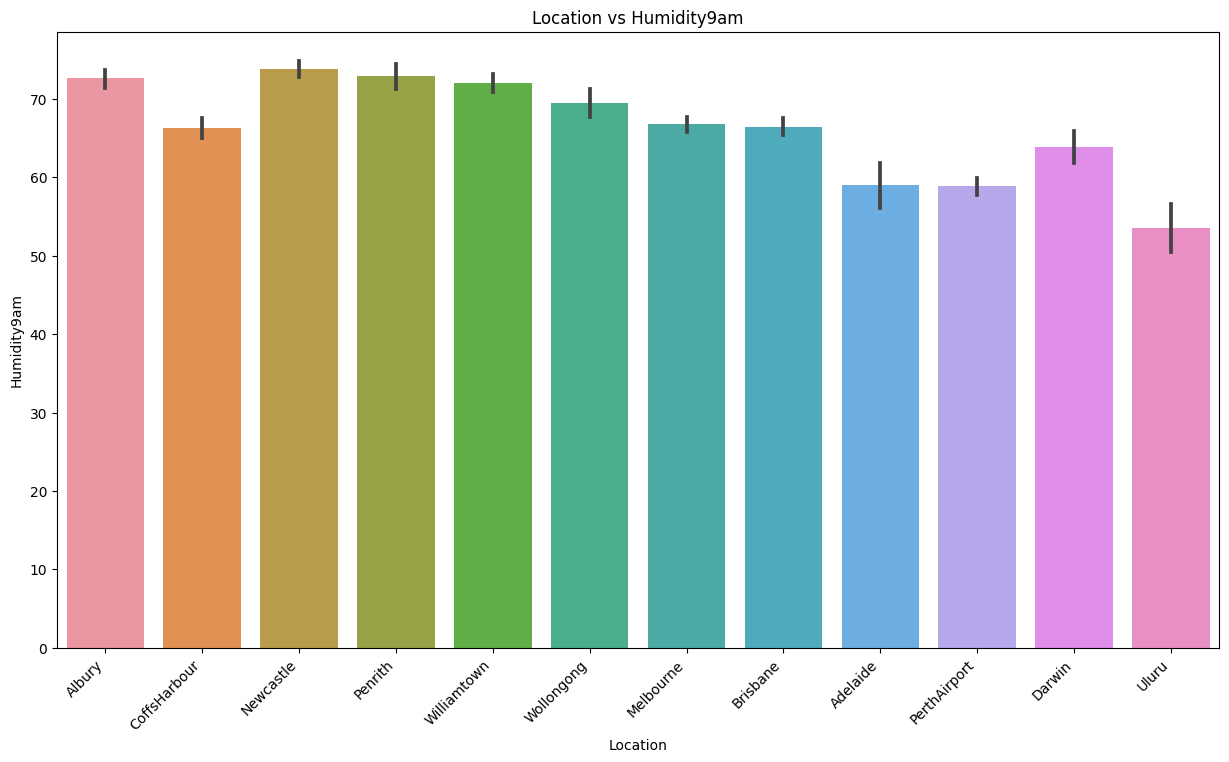

In [44]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Humidity9am', data=df)
plt.title('Location vs Humidity9am')
plt.xlabel('Location')
plt.ylabel('Humidity9am')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

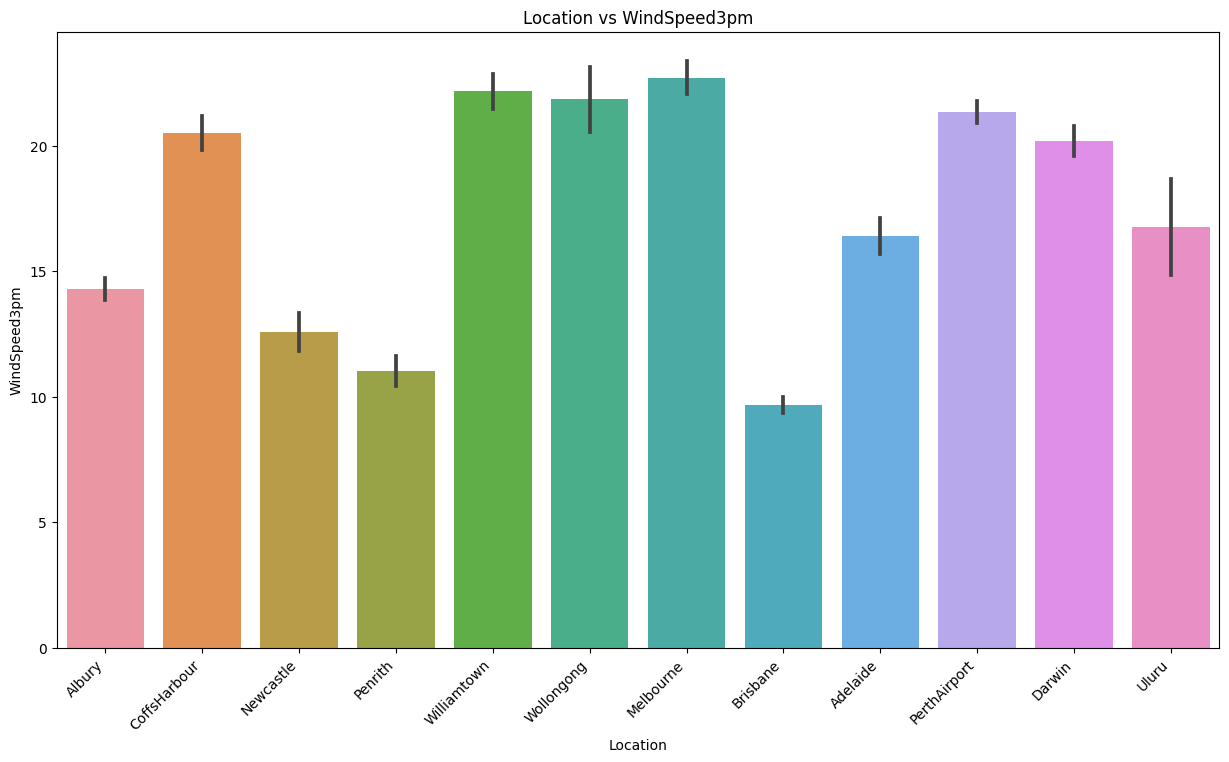

In [45]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='WindSpeed3pm', data=df)
plt.title('Location vs WindSpeed3pm')
plt.xlabel('Location')
plt.ylabel('WindSpeed3pm')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

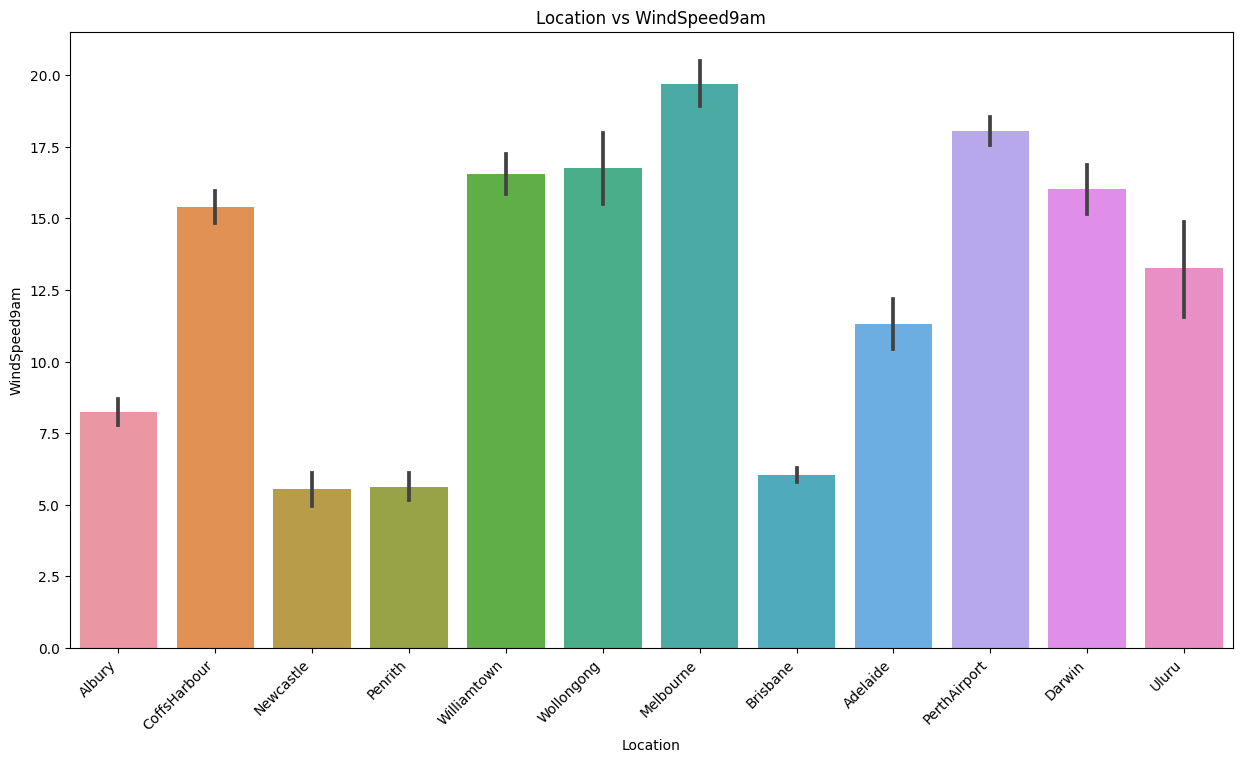

In [46]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='WindSpeed9am', data=df)
plt.title('Location vs WindSpeed9am')
plt.xlabel('Location')
plt.ylabel('WindSpeed9am')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

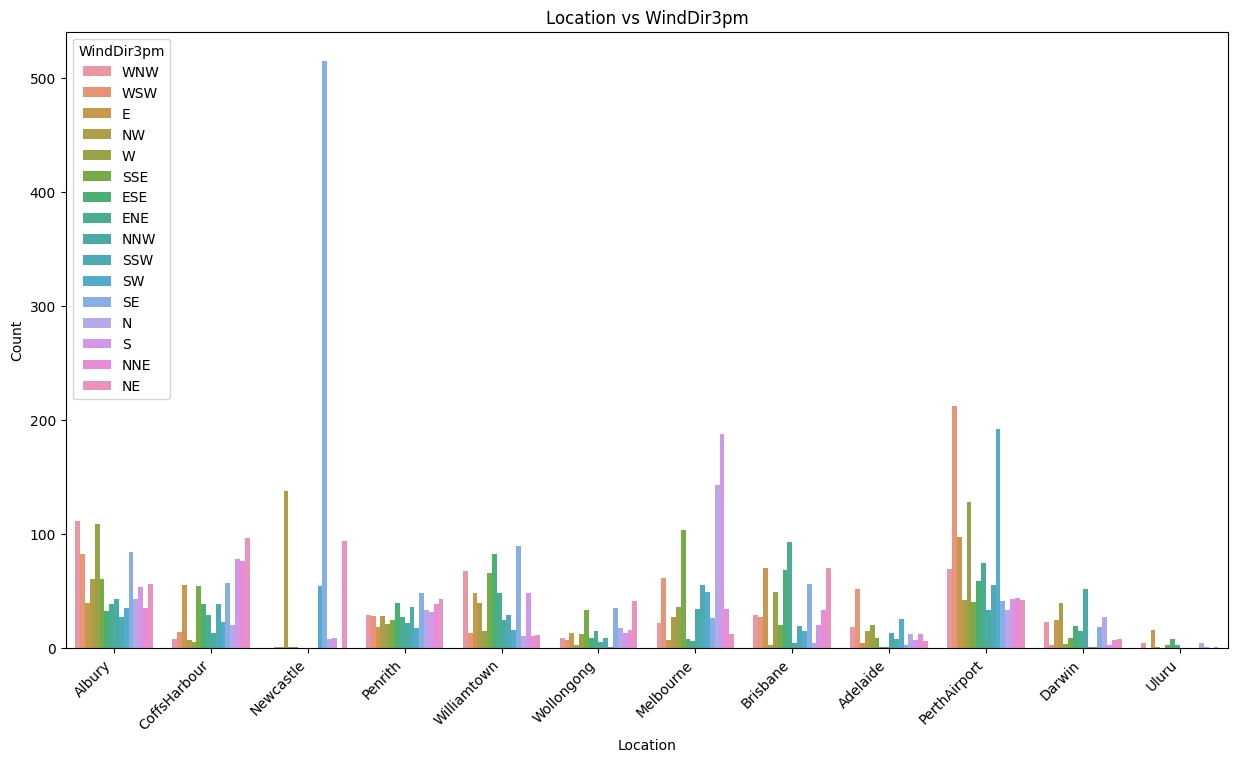

In [47]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Location', hue='WindDir3pm', data=df)
plt.title('Location vs WindDir3pm')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

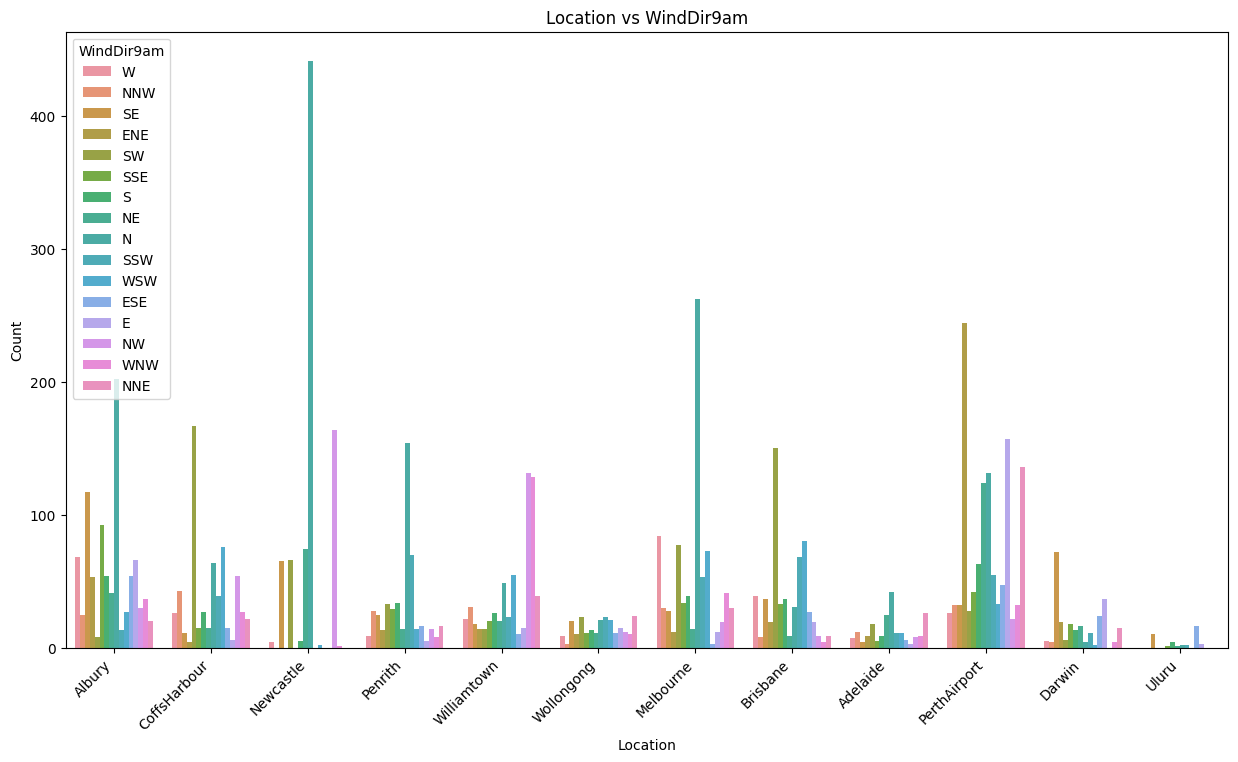

In [48]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Location', hue='WindDir9am', data=df)
plt.title('Location vs WindDir9am')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

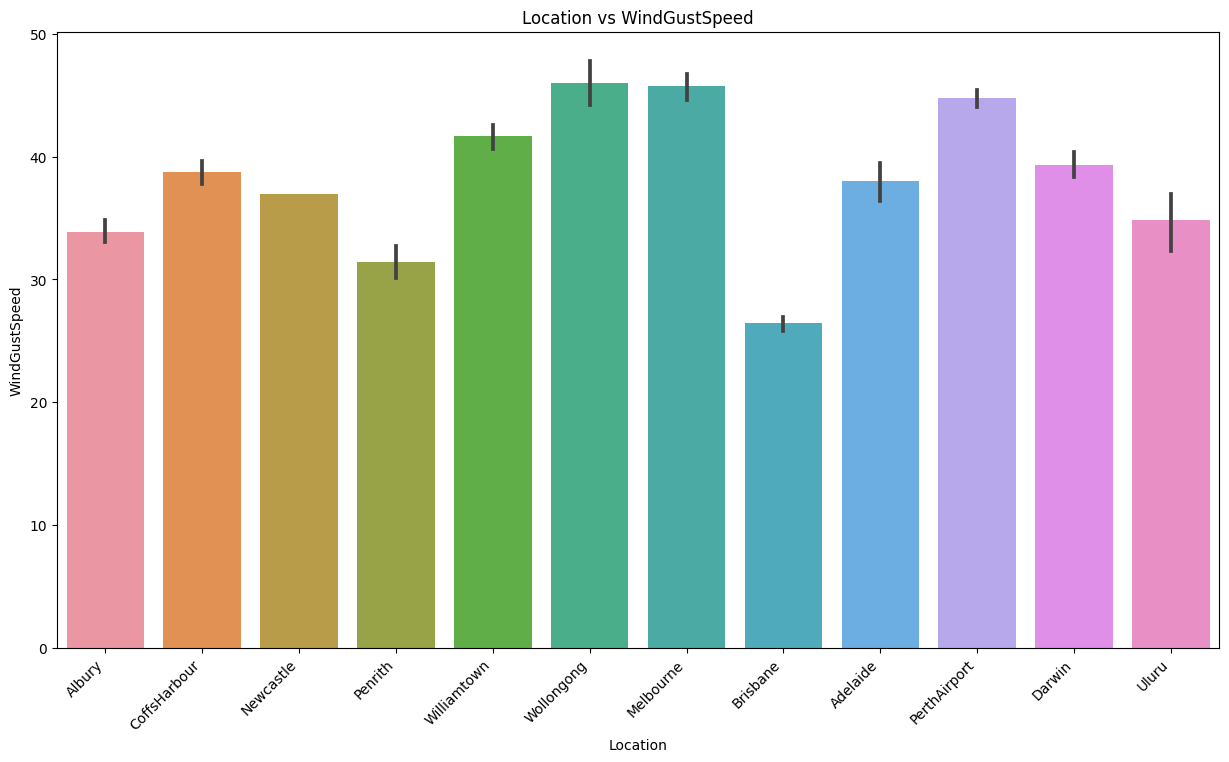

In [49]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='WindGustSpeed', data=df)
plt.title('Location vs WindGustSpeed')
plt.xlabel('Location')
plt.ylabel('WindGustSpeed')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

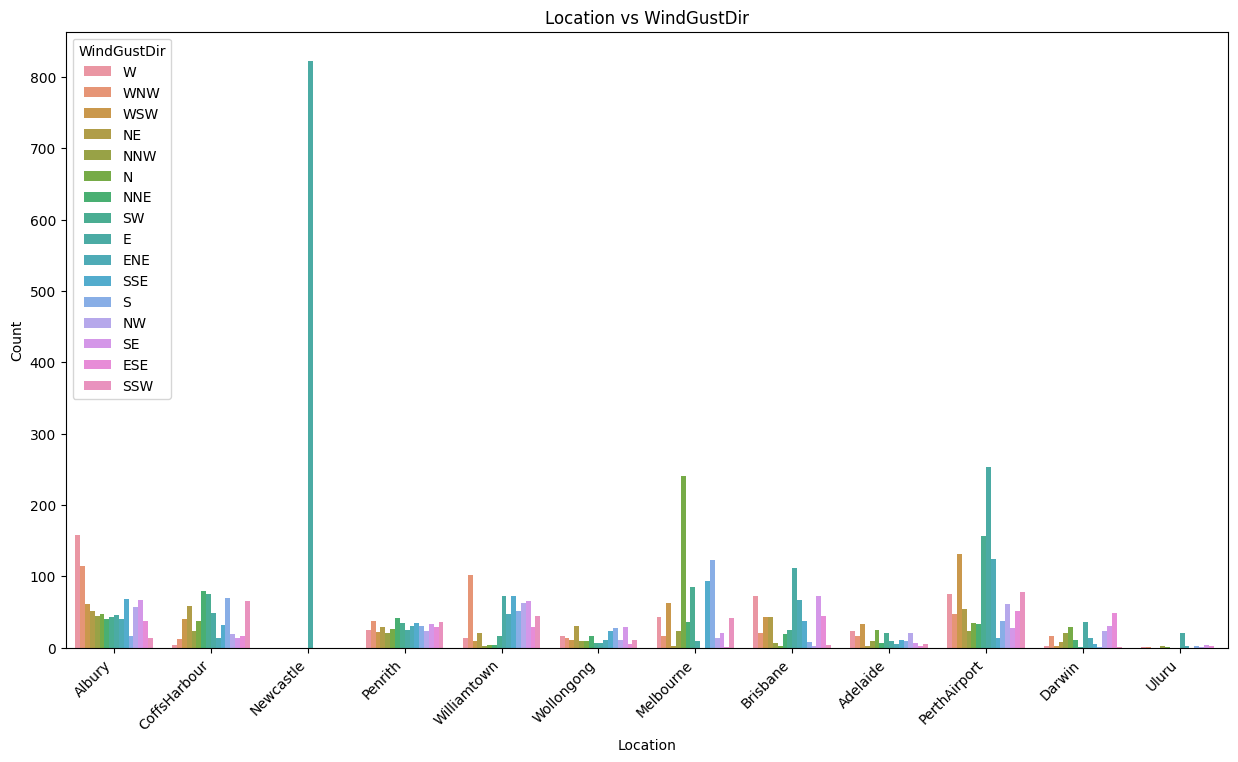

In [50]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Location', hue='WindGustDir', data=df)
plt.title('Location vs WindGustDir')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

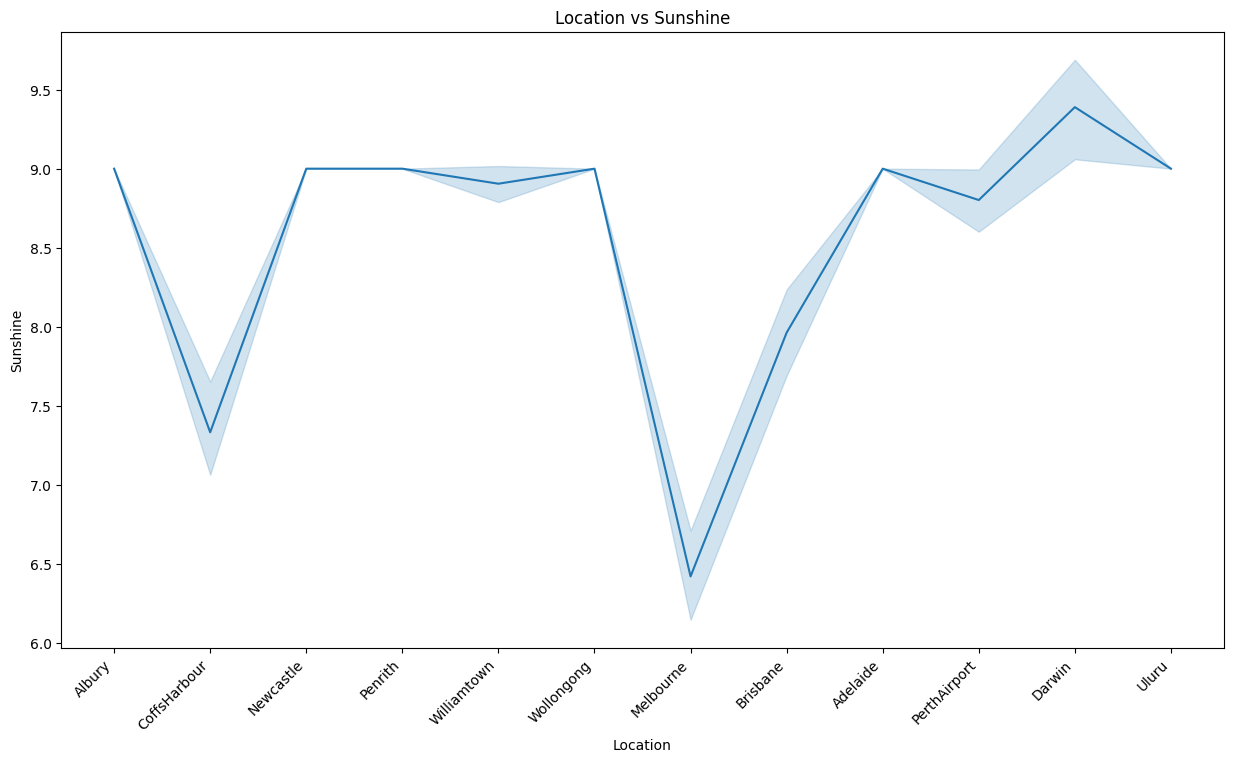

In [51]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Location', y='Sunshine', data=df)
plt.title('Location vs Sunshine')
plt.xlabel('Location')
plt.ylabel('Sunshine')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

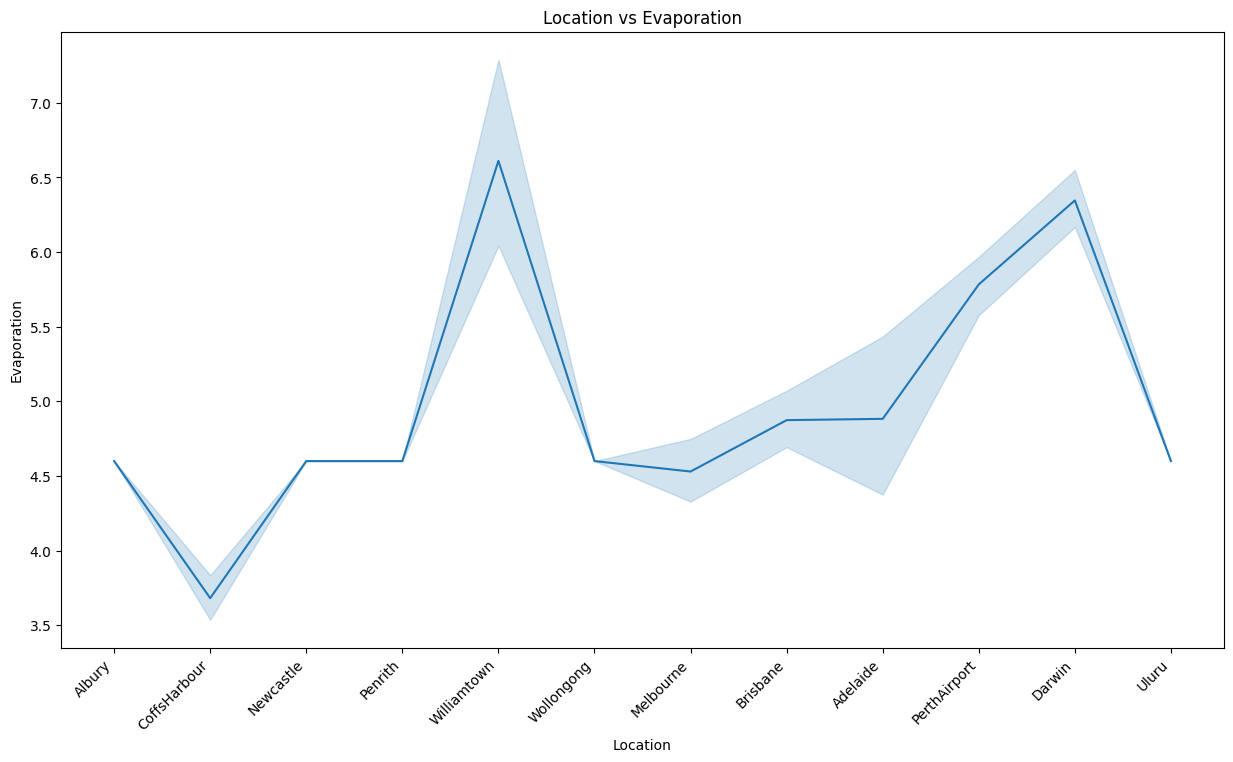

In [52]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Location', y='Evaporation', data=df)
plt.title('Location vs Evaporation')
plt.xlabel('Location')
plt.ylabel('Evaporation')
plt.xticks(rotation=45, ha='right')
plt.show()

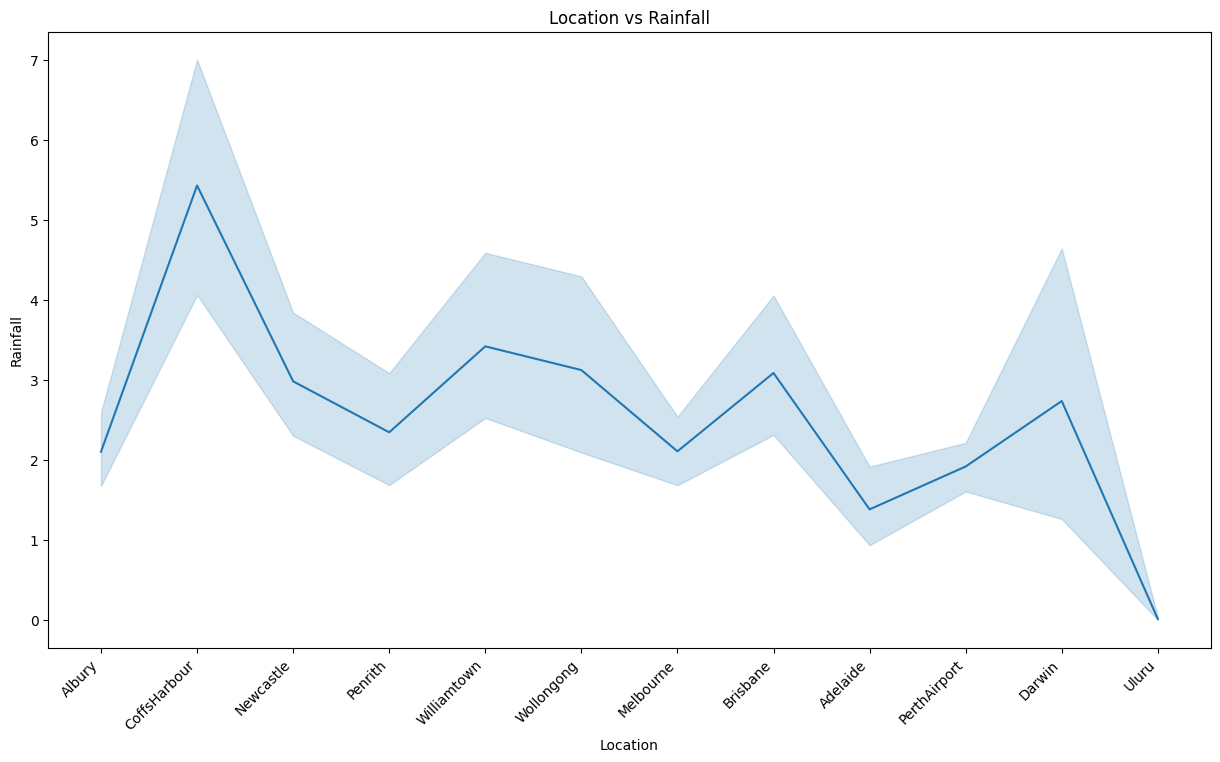

In [53]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Location', y='Rainfall', data=df)
plt.title('Location vs Rainfall')
plt.xlabel('Location')
plt.ylabel('Rainfall')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### Scatterplot

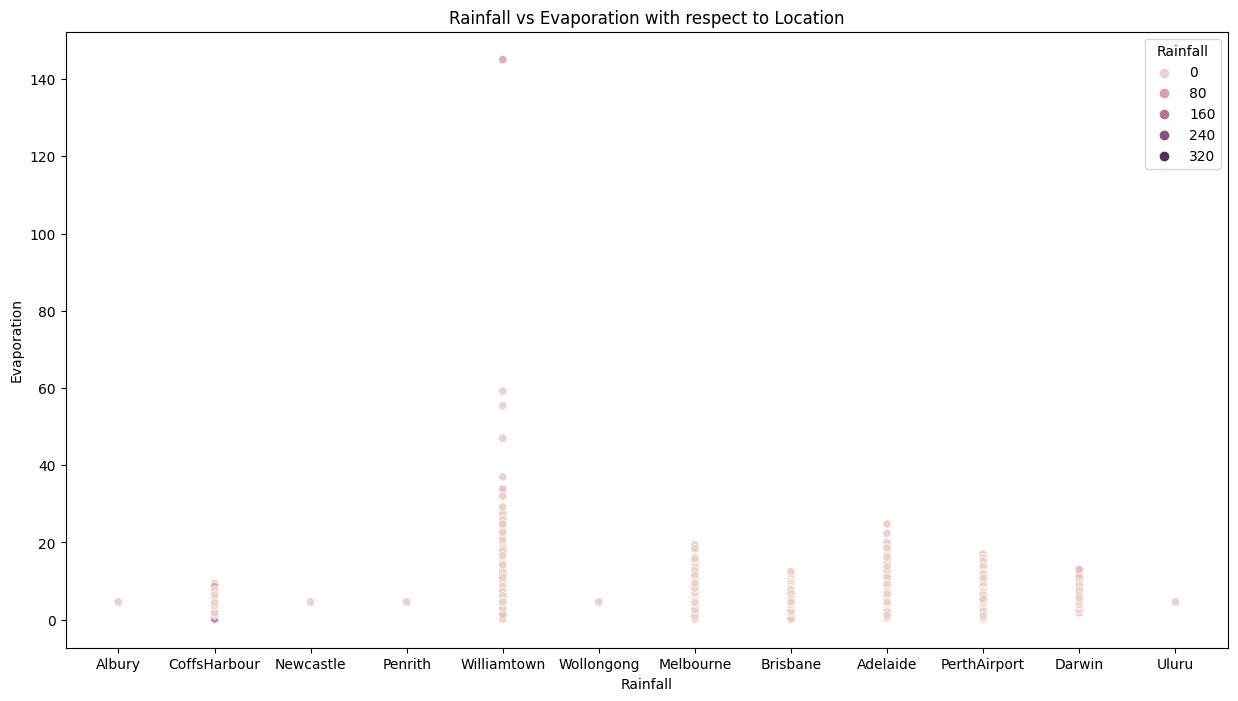

In [54]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Location', y='Evaporation', hue='Rainfall', data=df)
plt.title('Rainfall vs Evaporation with respect to Location')
plt.xlabel('Rainfall')
plt.ylabel('Evaporation')
plt.show()

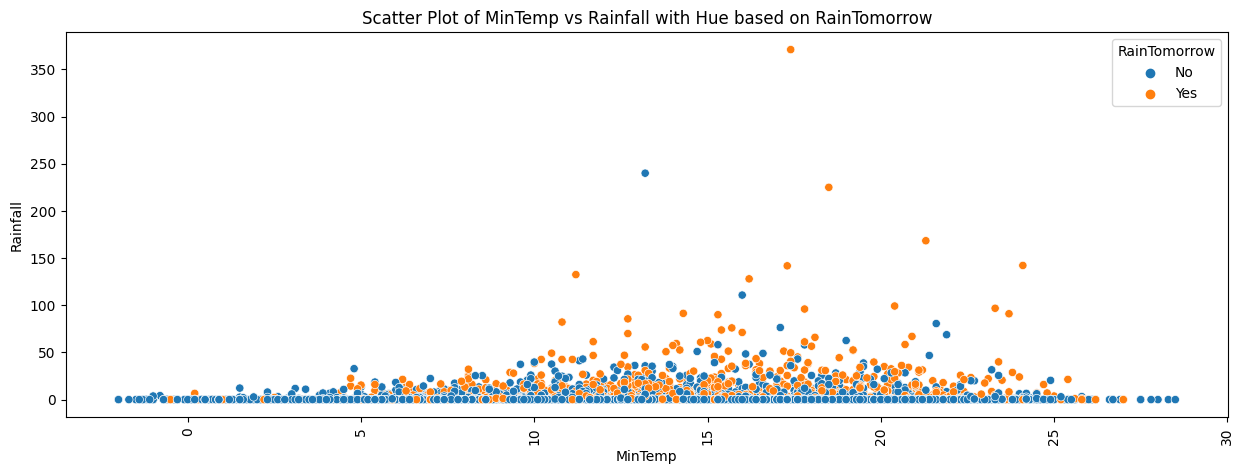

In [55]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.scatterplot(x='MinTemp', y='Rainfall', hue='RainTomorrow', data=df)
plt.title('Scatter Plot of MinTemp vs Rainfall with Hue based on RainTomorrow')
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')
plt.show()

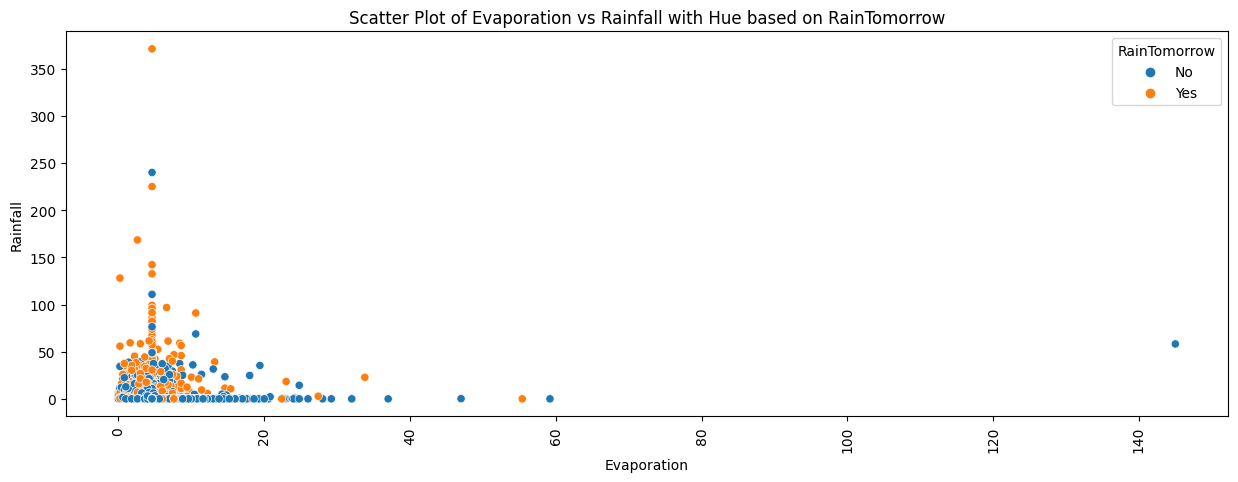

In [56]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.scatterplot(x='Evaporation', y='Rainfall', hue='RainTomorrow', data=df_new)
plt.title('Scatter Plot of Evaporation vs Rainfall with Hue based on RainTomorrow')
plt.xlabel('Evaporation')
plt.ylabel('Rainfall')
plt.show()

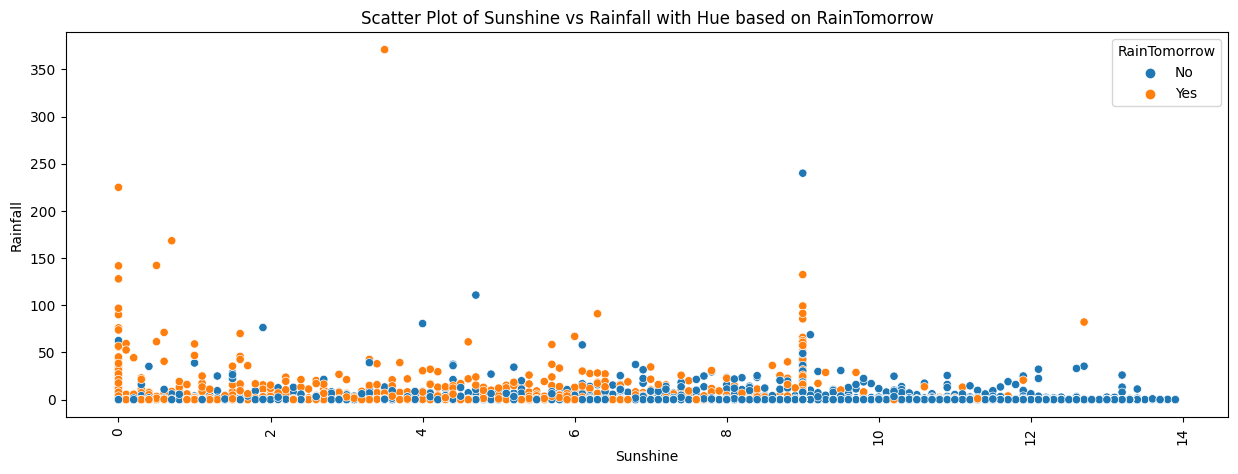

In [57]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.scatterplot(x='Sunshine', y='Rainfall', hue='RainTomorrow', data=df_new)
plt.title('Scatter Plot of Sunshine vs Rainfall with Hue based on RainTomorrow')
plt.xlabel('Sunshine')
plt.ylabel('Rainfall')
plt.show()

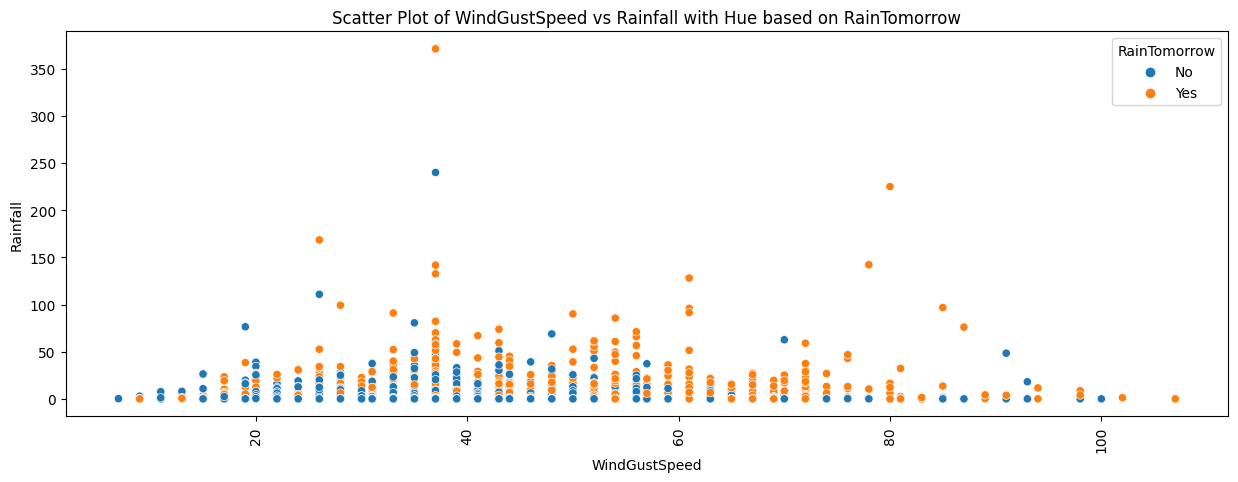

In [58]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.scatterplot(x='WindGustSpeed', y='Rainfall', hue='RainTomorrow', data=df_new)
plt.title('Scatter Plot of WindGustSpeed vs Rainfall with Hue based on RainTomorrow')
plt.xlabel('WindGustSpeed')
plt.ylabel('Rainfall')
plt.show()

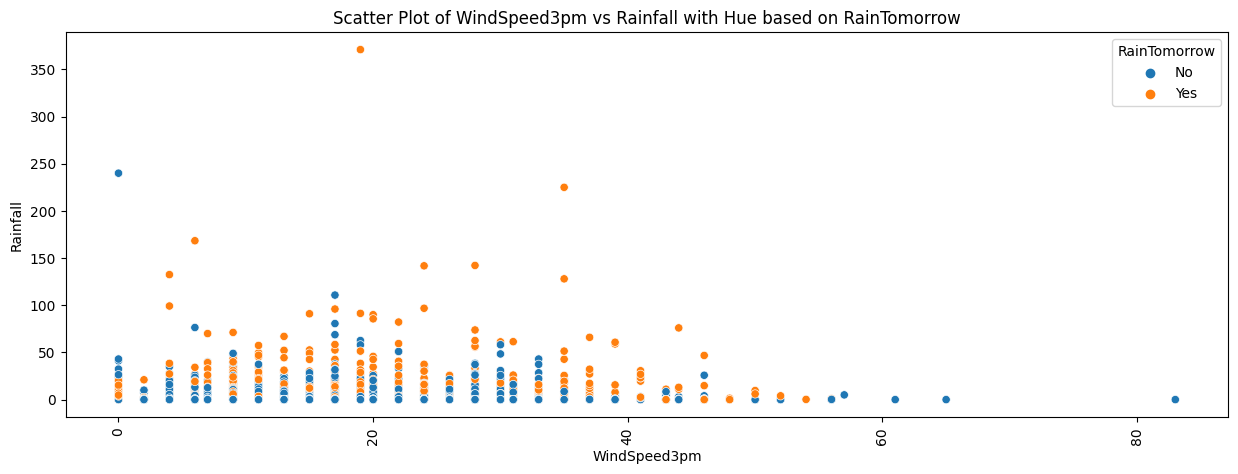

In [60]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.scatterplot(x='WindSpeed3pm', y='Rainfall', hue='RainTomorrow', data=df_new)
plt.title('Scatter Plot of WindSpeed3pm vs Rainfall with Hue based on RainTomorrow')
plt.xlabel('WindSpeed3pm')
plt.ylabel('Rainfall')
plt.show()

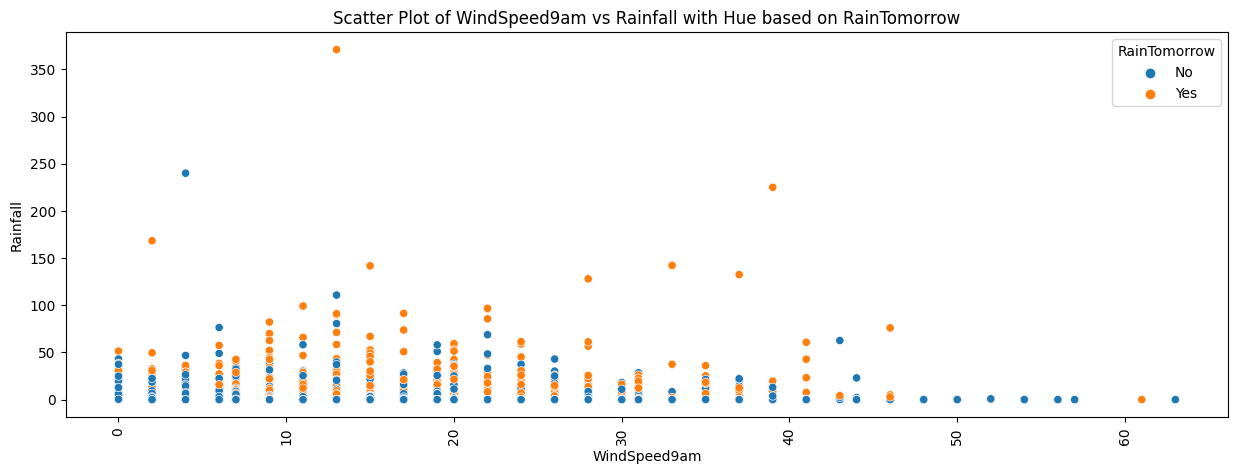

In [63]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.scatterplot(x='WindSpeed9am', y='Rainfall', hue='RainTomorrow', data=df_new)
plt.title('Scatter Plot of WindSpeed9am vs Rainfall with Hue based on RainTomorrow')
plt.xlabel('WindSpeed9am')
plt.ylabel('Rainfall')
plt.show()

#### Pie Chart


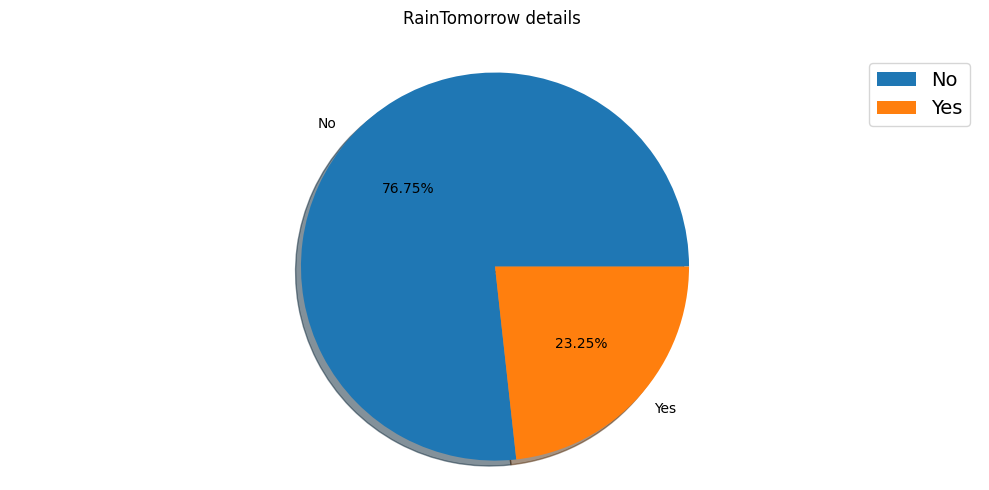

In [64]:
plt.figure(figsize=(10,5))
plt.pie(df['RainTomorrow'].value_counts(), labels=df['RainTomorrow'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('RainTomorrow details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

We can see that there is only 21.55% chances of rain tomorrow.

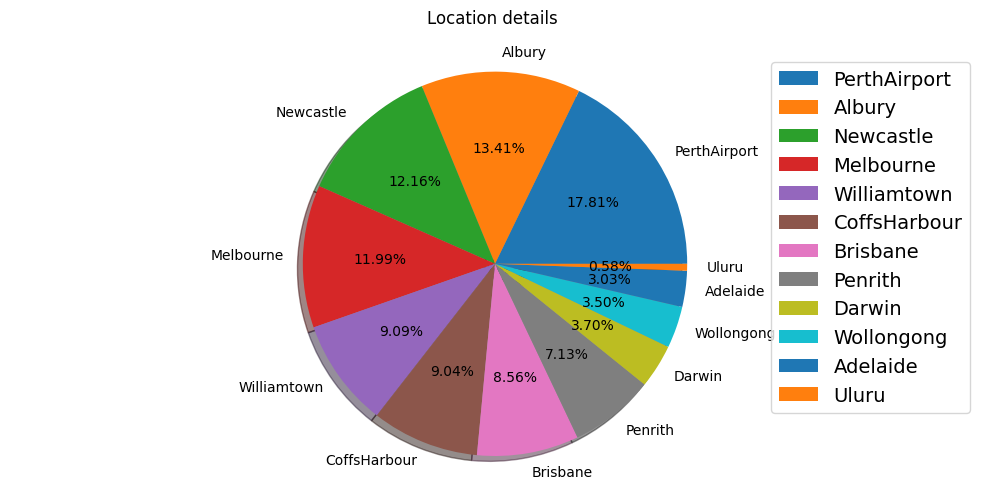

In [65]:
plt.figure(figsize=(10,5))
plt.pie(df['Location'].value_counts(), labels=df['Location'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Location details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

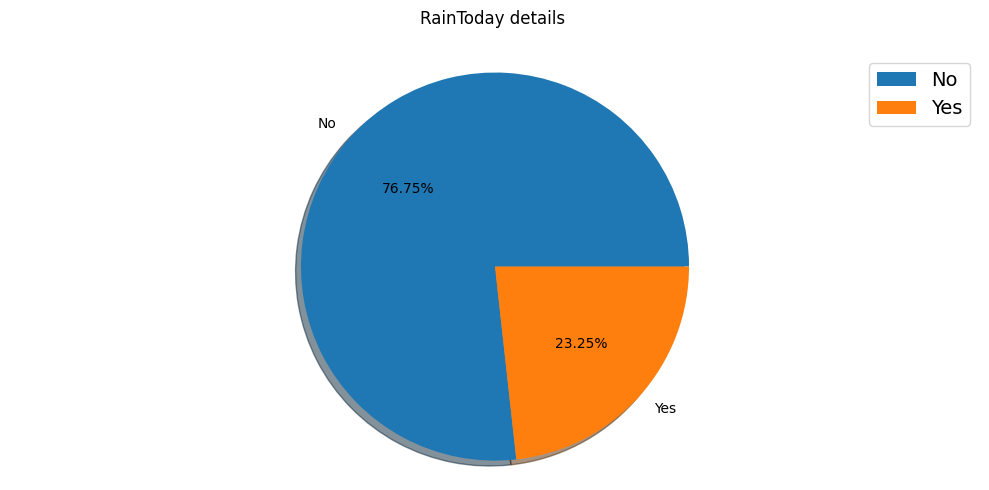

In [66]:
plt.figure(figsize=(10,5))
plt.pie(df['RainToday'].value_counts(), labels=df['RainToday'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('RainToday details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Pairplot

High relation between rainfall and RainTomorrow.

If it rains Today then Chances of raining tomorrow is less.

There are also Some linear relationships.

We can see that Wind Direction have an influence on rainfall.

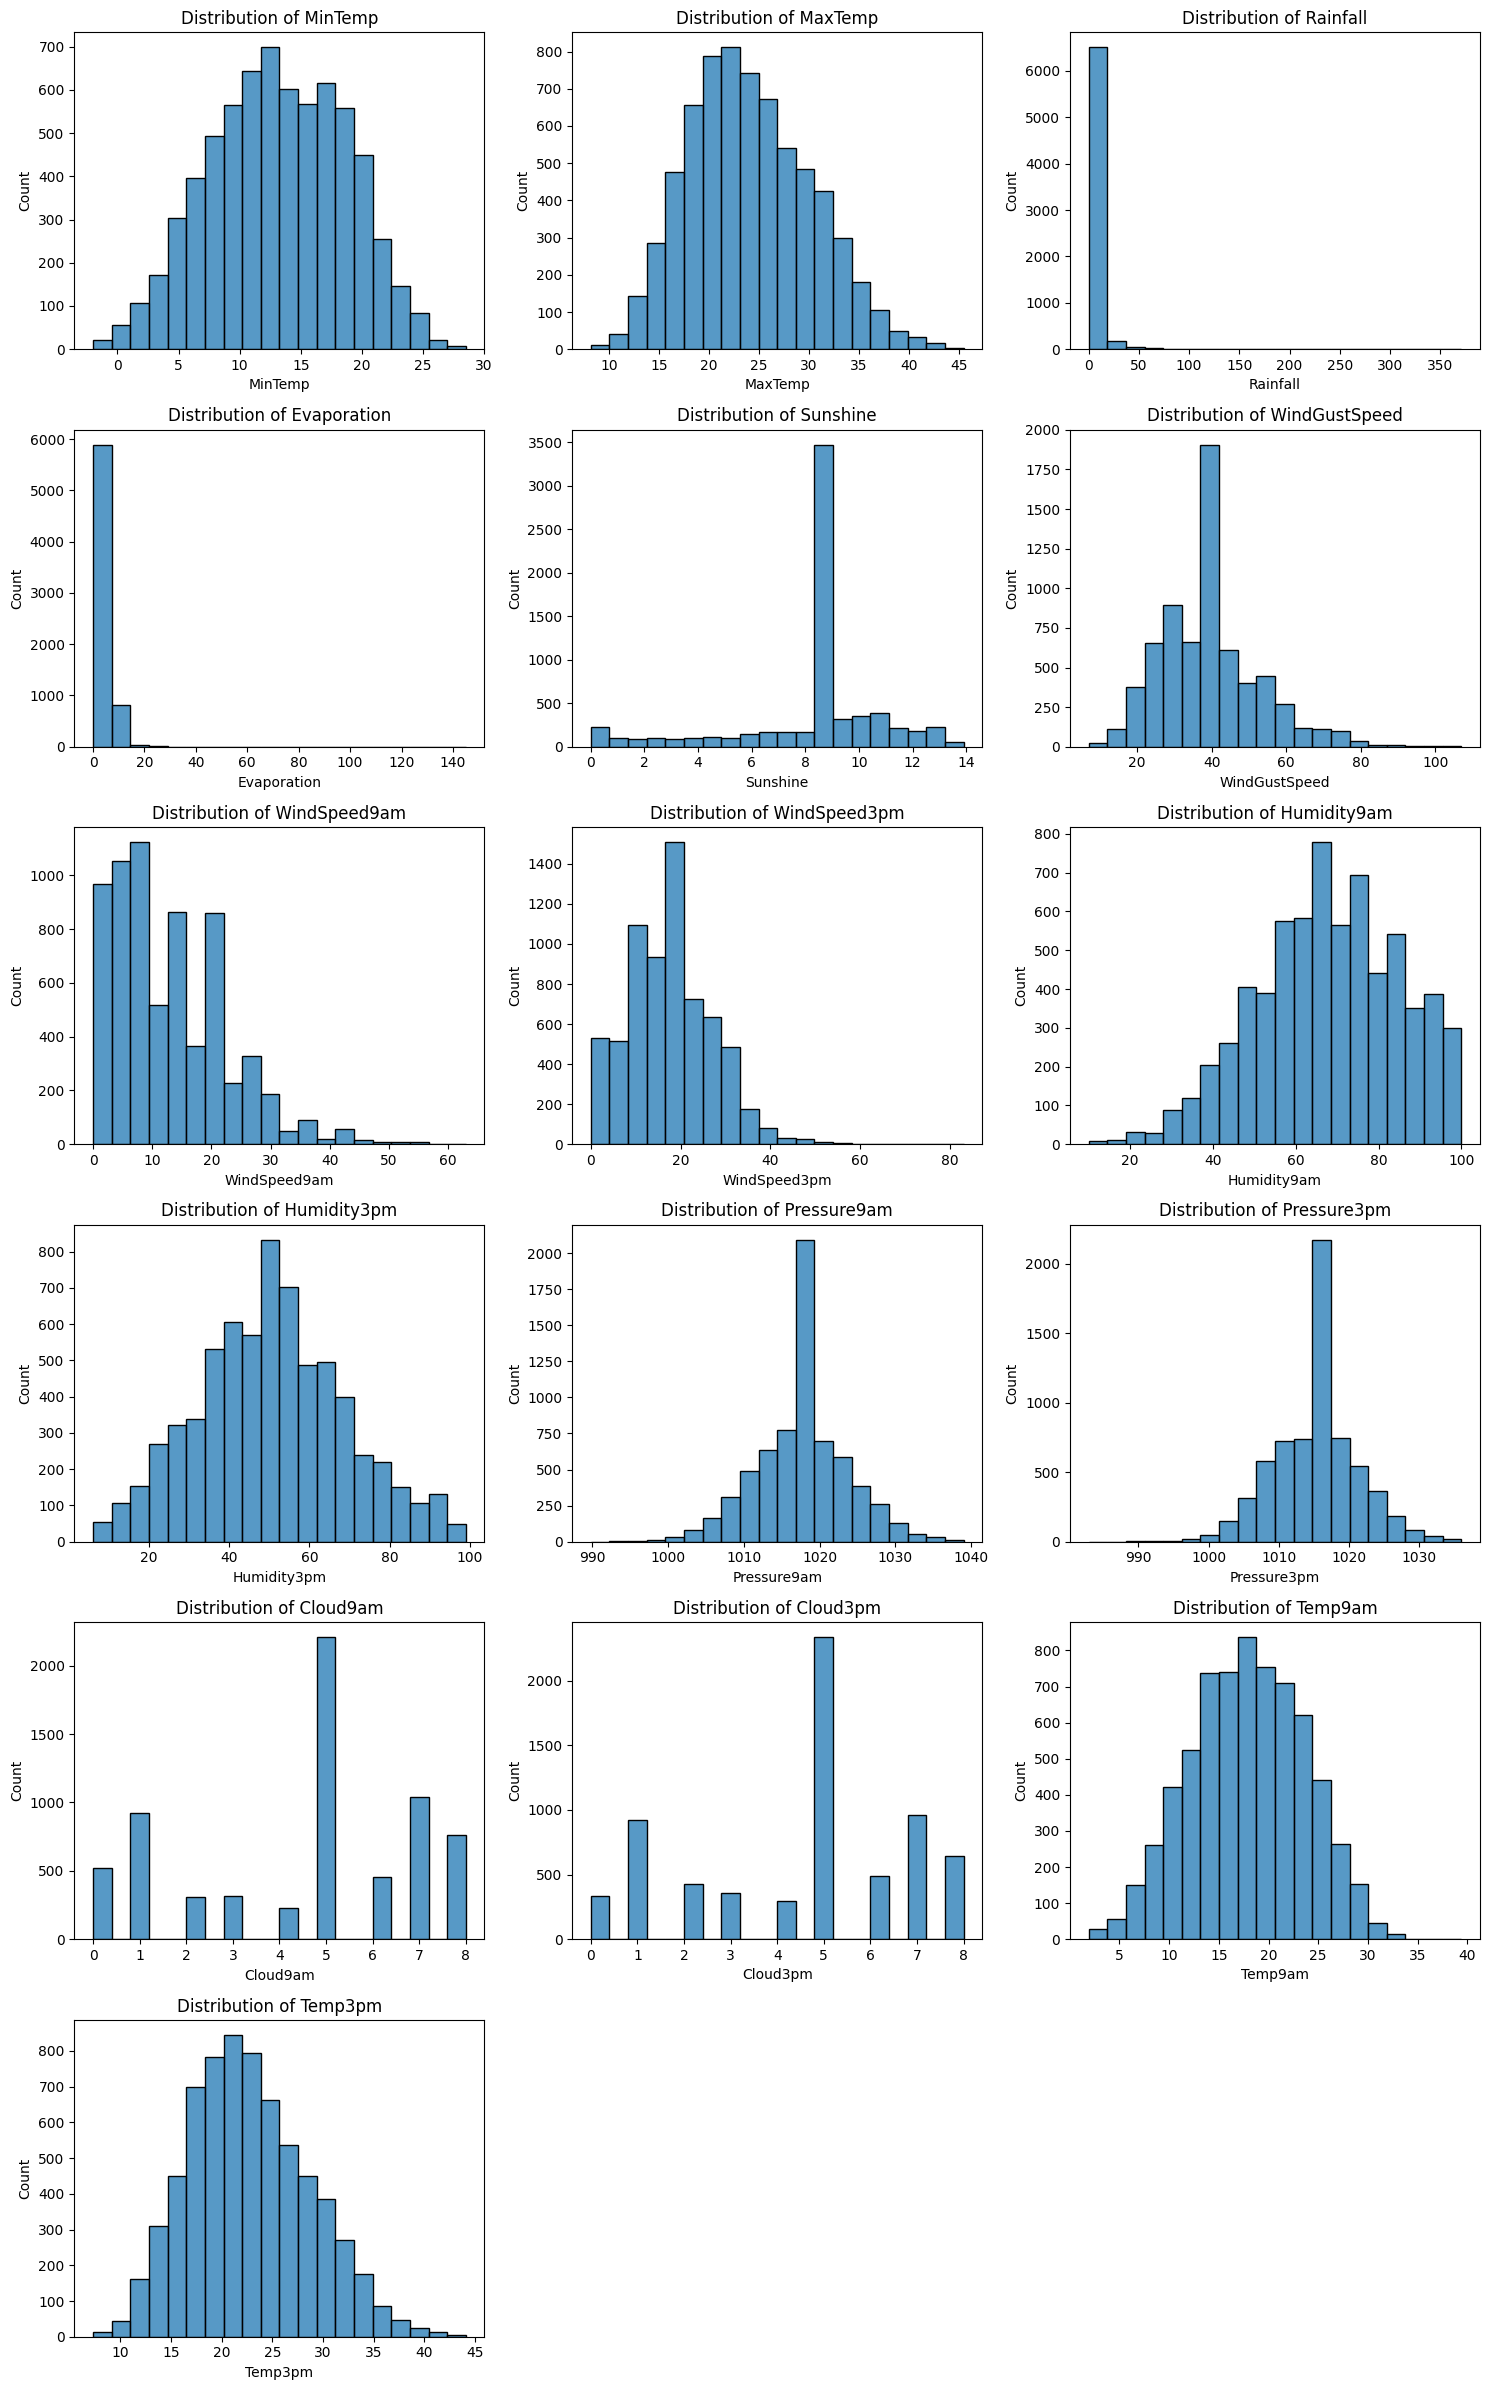

In [68]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=num_cols // 3 + 1, ncols=3, figsize=(15, 4 * (num_cols // 3 + 1)))

for i, column in enumerate(numerical_columns, 0):
    sns.histplot(df[column], kde=False, bins=20, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {column}')
    axes[i // 3, i % 3].set_xlabel(column)

# Remove any empty subplots
for j in range(num_cols, len(axes.flat)):
    axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()


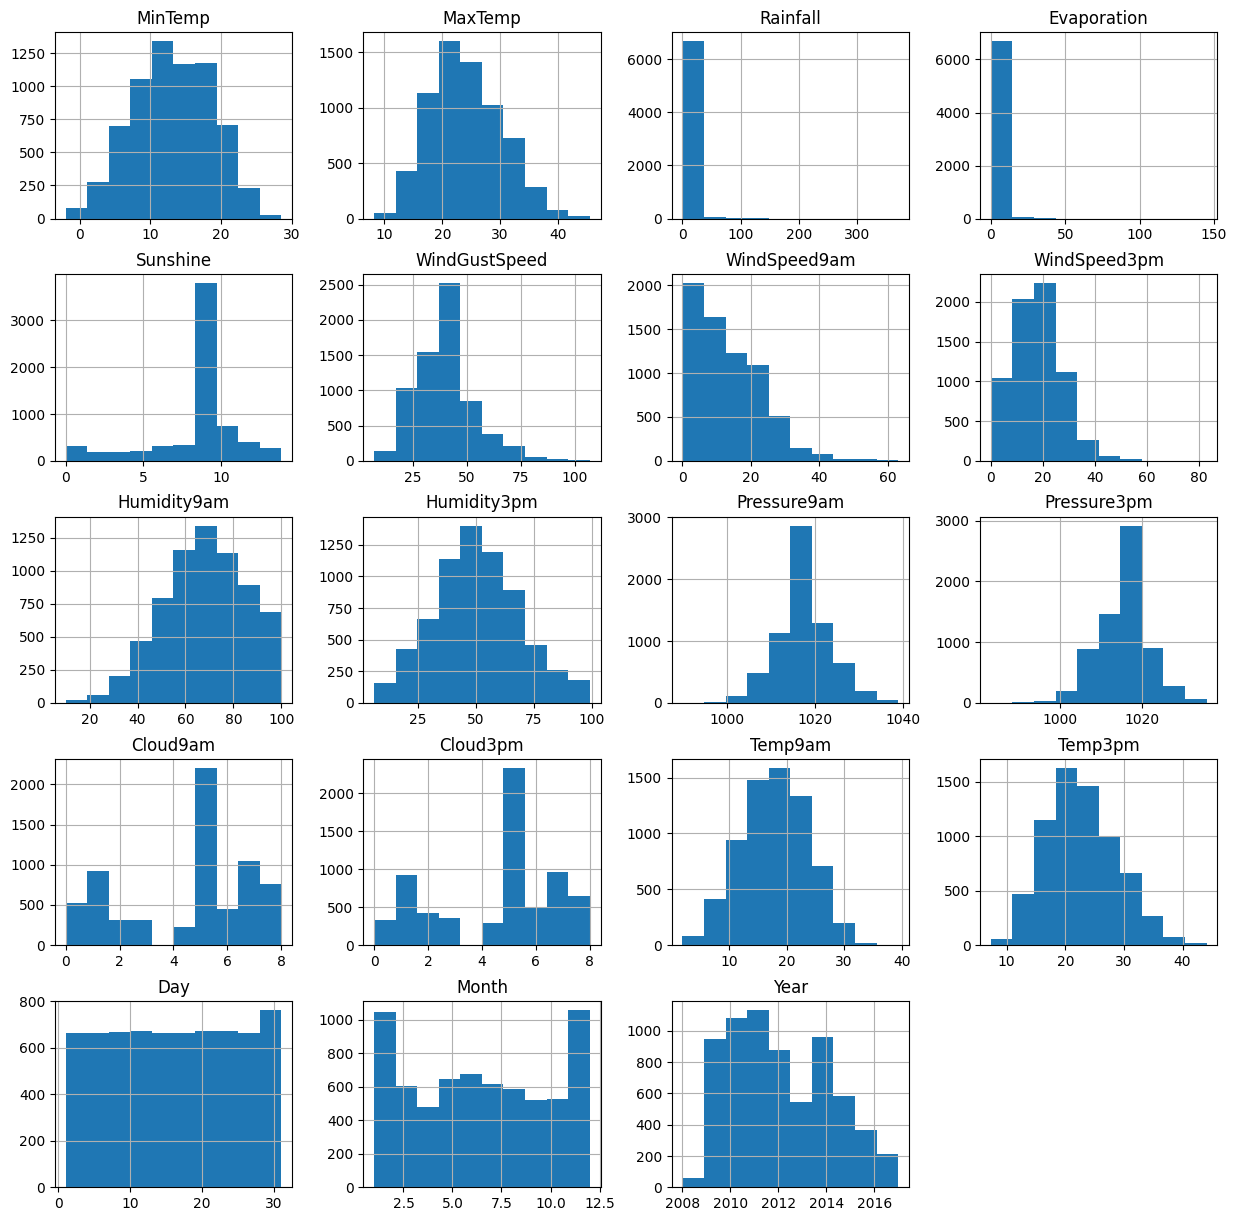

In [69]:
df.hist(figsize=(15,15))
plt.show()

## Encoding the categorical columns using Label Encoding

In [70]:
object_cols = df.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)

from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[object_cols]= df[object_cols].apply(LE.fit_transform)

Object columns: Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [71]:
df.sample(10)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8074         8     18.3     32.9       0.0          7.4      10.4   
1229         3     21.3     30.9       0.0          6.4      11.0   
4592         5     17.4     39.2       0.0         10.8      12.1   
6174         2     21.4     31.8       0.0          6.4      12.0   
7902         8     10.3     24.7       0.0          5.8      12.3   
8137         4     23.8     32.2      28.8          5.8       9.3   
5267         5     10.7     22.4      25.0          6.8      11.9   
1330         3      8.2     22.1       0.0          3.2      10.3   
4611         5     13.4     27.6       0.0          5.2      13.8   
3349        10     23.2     24.8       0.0          4.6       9.0   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
8074            3           31.0           5          15  ...       1014.3   
1229            4           54.0          11           5  ...       1008.3   
4592            3           59.0           3           7  ...       1009.4   
6174            0           33.0           9           0  ...       1014.3   
7902            1           50.0           1           9  ...       1020.7   
8137            9           72.0          10          14  ...       1003.1   
5267           12           28.0          15          13  ...       1014.8   
1330           12           33.0          15           8  ...       1017.8   
4611           10           33.0           9          10  ...       1014.9   
3349           11           74.0           5           7  ...       1006.3   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
8074       0.0       0.0     26.2     31.0          0             0   12   
1229       1.0       3.0     27.9     30.3          0             0   26   
4592       6.0       6.0     27.2     37.7          0             0   16   
6174       5.0       3.0     27.8     30.5          0             0   14   
7902       0.0       1.0     16.9     24.0          0             0   22   
8137       6.0       7.0     28.2     31.0          1             1    7   
5267       5.0       5.0     15.2     20.9          1             0   21   
1330       2.0       1.0     17.4     21.5          0             0    7   
4611       1.0       4.0     17.5     25.4          0             0    4   
3349       7.0       8.0     24.5     23.5          0             1   30   

      Month  Year  
8074      4  2014  
1229      1  2010  
4592     12  2009  
6174      2  2011  
7902     10  2013  
8137      3  2012  
5267     11  2011  
1330      5  2010  
4611      1  2010  
3349      3  2017  

[10 rows x 25 columns]

## Correlation

In [72]:
df.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.090455  0.070761 -0.004972     0.134965  0.068411   
MinTemp        0.090455  1.000000  0.728059  0.090971     0.284696  0.001976   
MaxTemp        0.070761  0.728059  1.000000 -0.087604     0.356420  0.323262   
Rainfall      -0.004972  0.090971 -0.087604  1.000000    -0.003746 -0.190464   
Evaporation    0.134965  0.284696  0.356420 -0.003746     1.000000  0.251882   
Sunshine       0.068411  0.001976  0.323262 -0.190464     0.251882  1.000000   
WindGustDir   -0.086385 -0.136435 -0.194877  0.026811    -0.078315 -0.114589   
WindGustSpeed  0.254955  0.242823  0.166300  0.086519     0.177502 -0.020876   
WindDir9am    -0.088884 -0.020884 -0.192277  0.091260    -0.073454 -0.093530   
WindDir3pm    -0.001275 -0.139534 -0.161038  0.031770    -0.039664 -0.041657   
WindSpeed9am   0.239883  0.168996  0.056452  0.050206     0.166140 -0.056071   
WindSpeed3pm   0.229565  0.188485  0.115951  0.020421     0.137540  0.003493   
Humidity9am   -0.033586 -0.154218 -0.425100  0.227943    -0.269767 -0.327091   
Humidity3pm   -0.001569  0.067847 -0.430599  0.243005    -0.195361 -0.428461   
Pressure9am   -0.037942 -0.441143 -0.337744 -0.071069    -0.202387  0.003736   
Pressure3pm   -0.024722 -0.440282 -0.413056 -0.032681    -0.217644 -0.050353   
Cloud9am      -0.017268  0.073205 -0.247744  0.184536    -0.093375 -0.488498   
Cloud3pm      -0.021092  0.022233 -0.246742  0.151333    -0.135537 -0.515504   
Temp9am        0.098576  0.891417  0.866654 -0.004365     0.337970  0.185468   
Temp3pm        0.066010  0.696861  0.974994 -0.091795     0.347958  0.344193   
RainToday     -0.004280  0.075902 -0.225526  0.461817    -0.113699 -0.249807   
RainTomorrow  -0.004506  0.097173 -0.160063  0.223599    -0.077340 -0.337550   
Day           -0.000710  0.014356  0.016108 -0.007989     0.011120  0.000706   
Month         -0.067376 -0.237204 -0.171616 -0.015187    -0.002998 -0.005828   
Year           0.503047  0.032974  0.081092 -0.008516     0.114748  0.134089   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.086385       0.254955   -0.088884   -0.001275  ...   
MinTemp          -0.136435       0.242823   -0.020884   -0.139534  ...   
MaxTemp          -0.194877       0.166300   -0.192277   -0.161038  ...   
Rainfall          0.026811       0.086519    0.091260    0.031770  ...   
Evaporation      -0.078315       0.177502   -0.073454   -0.039664  ...   
Sunshine         -0.114589      -0.020876   -0.093530   -0.041657  ...   
WindGustDir       1.000000       0.036005    0.378772    0.455305  ...   
WindGustSpeed     0.036005       1.000000   -0.065090    0.076963  ...   
WindDir9am        0.378772      -0.065090    1.000000    0.216648  ...   
WindDir3pm        0.455305       0.076963    0.216648    1.000000  ...   
WindSpeed9am      0.064319       0.603379    0.058798    0.010617  ...   
WindSpeed3pm      0.132153       0.628393    0.045955    0.084654  ...   
Humidity9am       0.015063      -0.274375    0.015394   -0.005547  ...   
Humidity3pm       0.025824      -0.100244    0.126914   -0.009709  ...   
Pressure9am      -0.100428      -0.393348   -0.027334   -0.139029  ...   
Pressure3pm      -0.023902      -0.362226    0.051862   -0.049335  ...   
Cloud9am          0.133483       0.004758    0.079251    0.075979  ...   
Cloud3pm          0.095415       0.042975    0.058186    0.055951  ...   
Temp9am          -0.153390       0.222317   -0.071205   -0.146437  ...   
Temp3pm          -0.207326       0.130483   -0.200530   -0.175251  ...   
RainToday         0.112410       0.085641    0.157884    0.094507  ...   
RainTomorrow      0.045179       0.184400    0.040399    0.004301  ...   
Day               0.013606      -0.002539   -0.014730    0.001723  ...   
Month             0.032066       0.048189    0.019799    0.034494  ...   
Year             -0.174132      -0.043982   -0.062314    0.010694  ...   

         

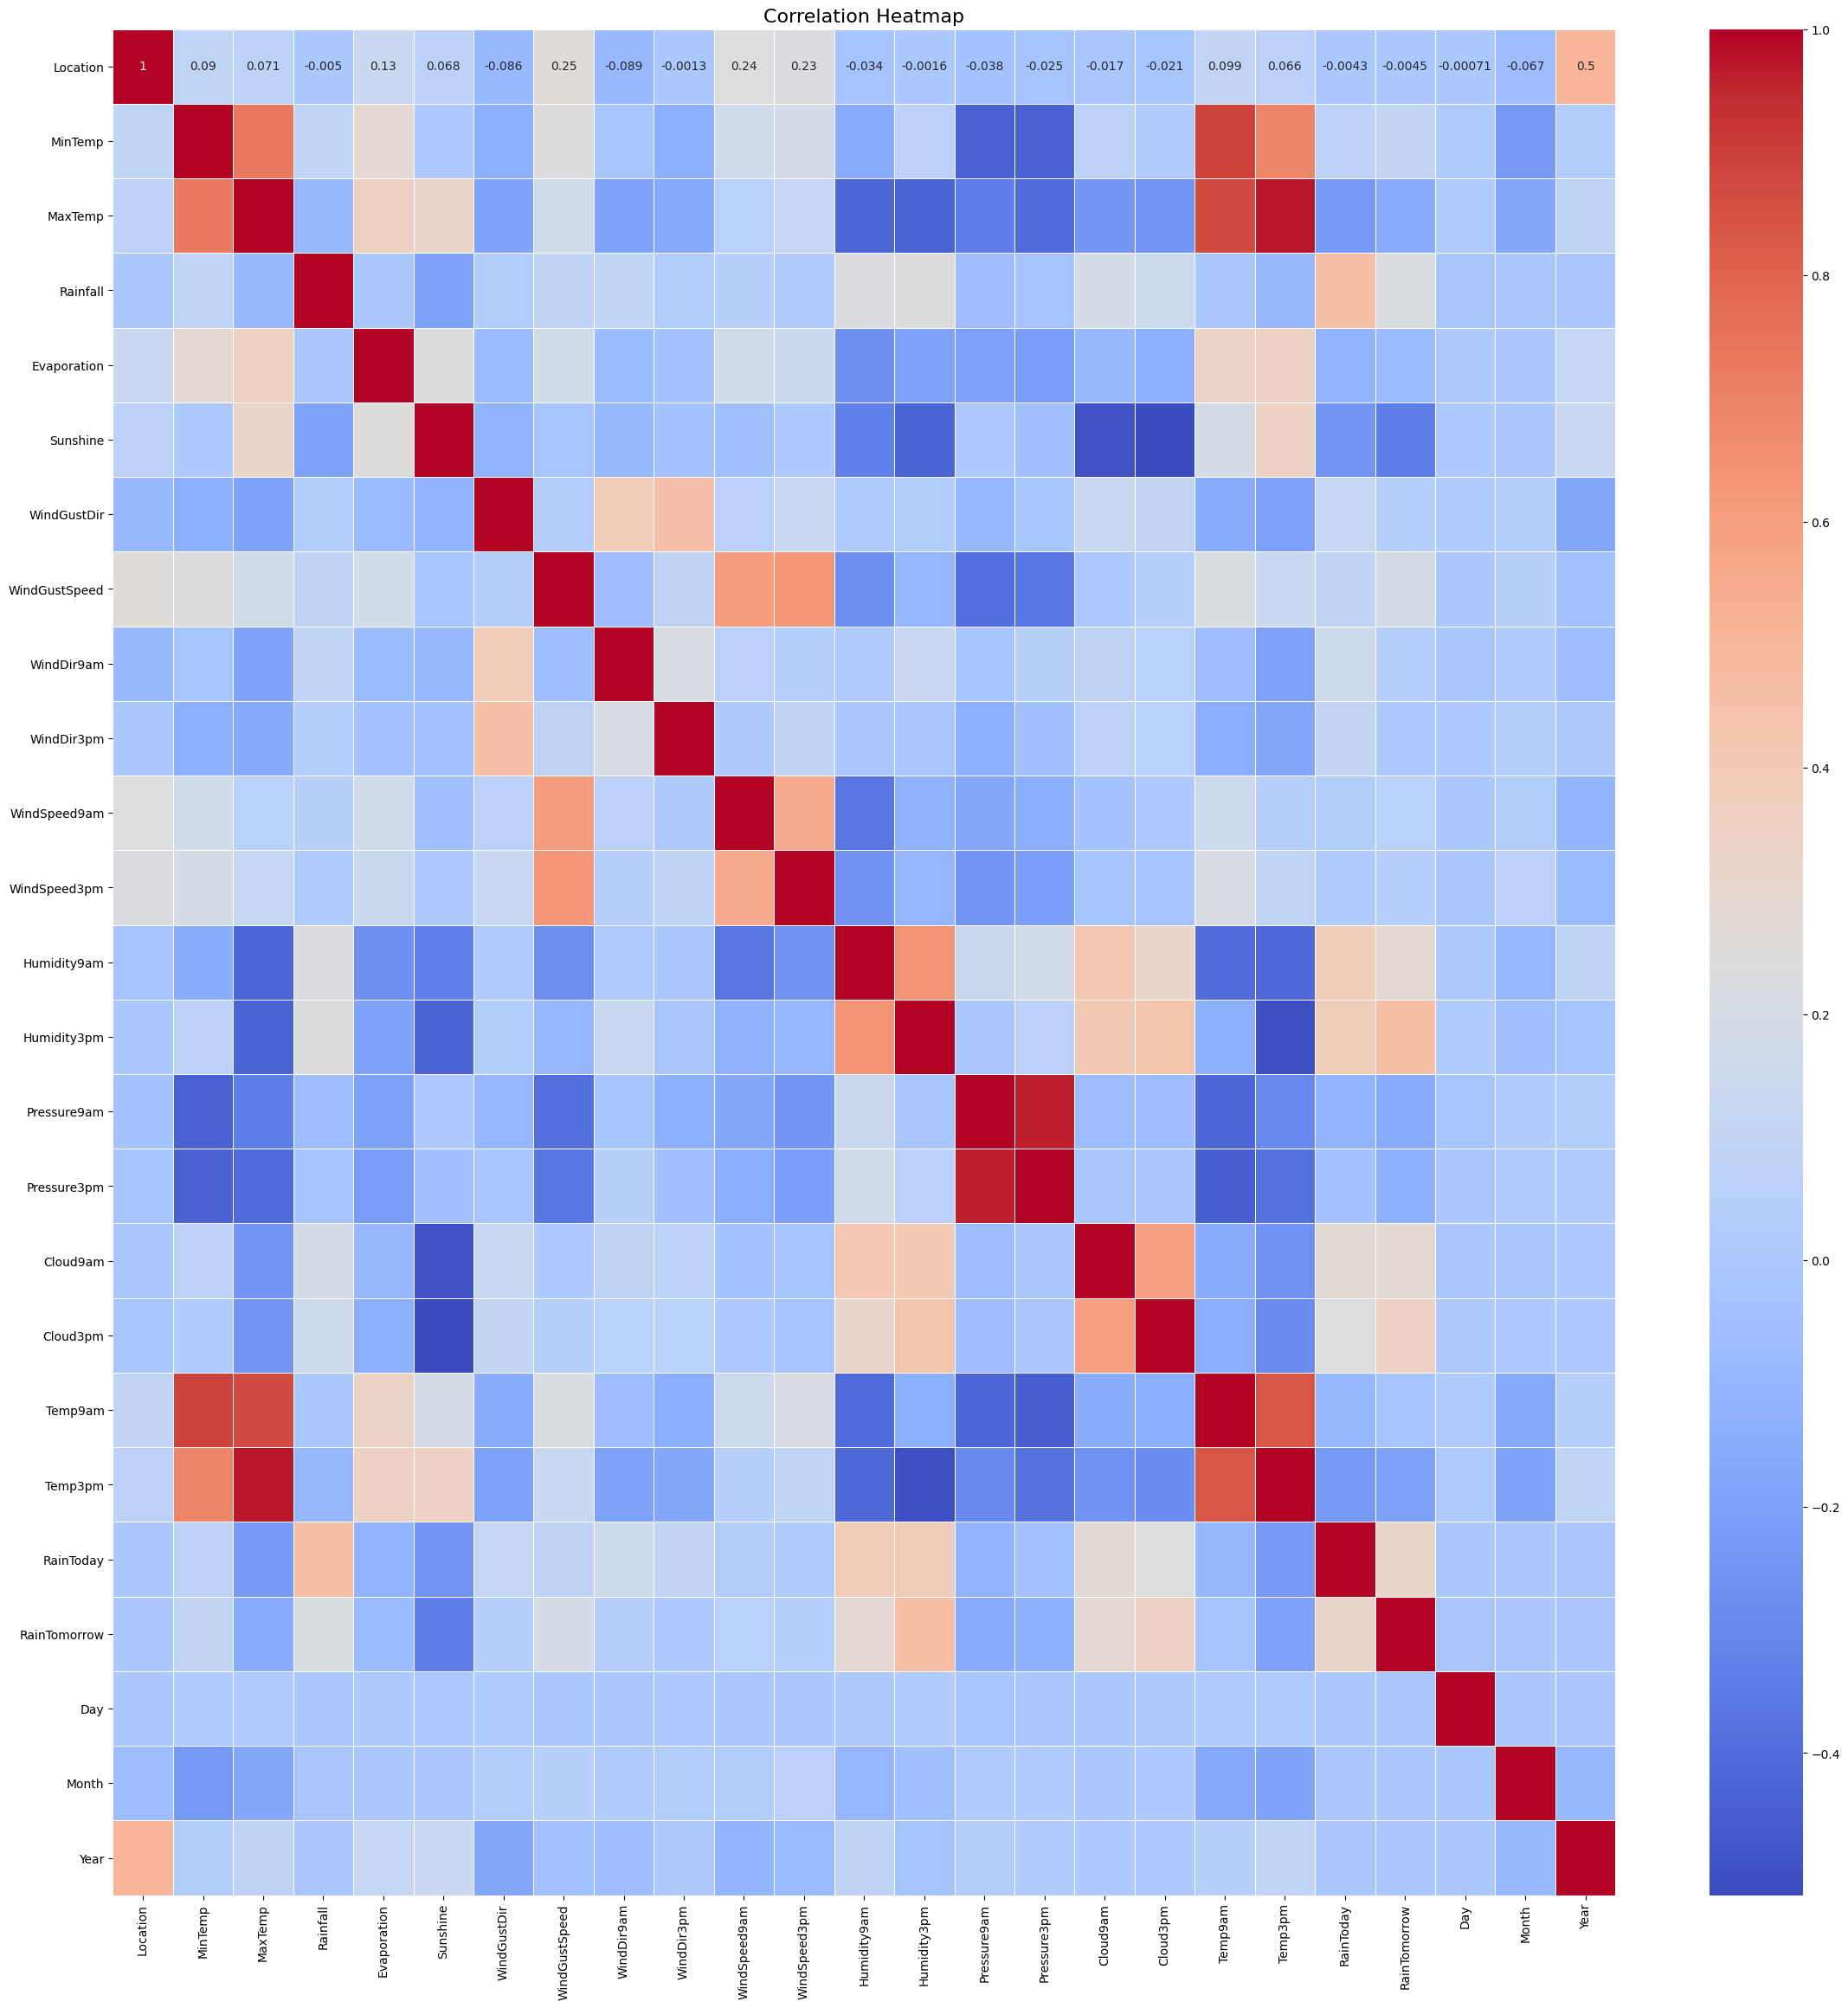

In [73]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(28, 28))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

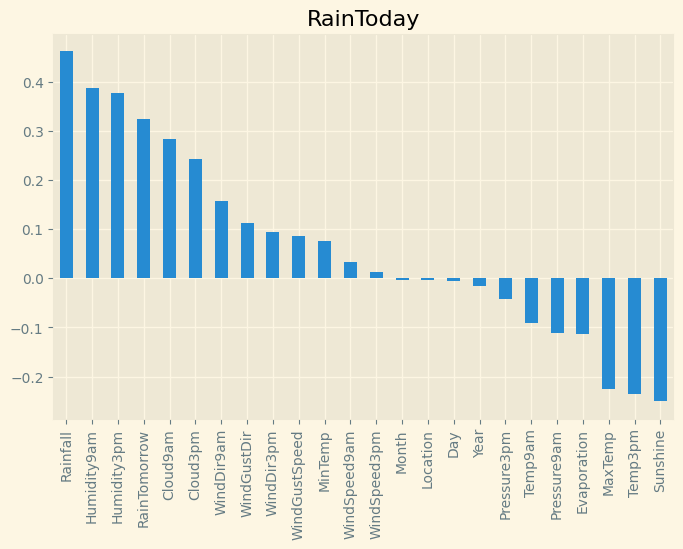

In [76]:
plt.style.use('Solarize_Light2')
loan_corr = df.corr()
plt.figure(figsize=(8, 5))
plt.title('RainToday')
loan_corr['RainToday'].sort_values(ascending=False).drop('RainToday').plot.bar()
plt.show()

## Seprating features and label

In [77]:
x = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [78]:
y.value_counts()

RainTomorrow
0    5190
1    1572
Name: count, dtype: int64

## Feature Scaling

In [79]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0    -1.395097  0.052329 -0.194668 -0.202435     -0.11869  0.207361   
1    -1.395097 -1.030652  0.164227 -0.259635     -0.11869  0.207361   
2    -1.395097 -0.037920  0.262108 -0.259635     -0.11869  0.207361   
3    -1.395097 -0.705758  0.637317 -0.259635     -0.11869  0.207361   
4    -1.395097  0.792365  1.338795 -0.164301     -0.11869  0.207361   
...        ...       ...       ...       ...          ...       ...   
6757  1.186193 -1.860937 -0.113101 -0.259635     -0.11869  0.207361   
6758  1.186193 -1.716540  0.196854 -0.259635     -0.11869  0.207361   
6759  1.186193 -1.391646  0.457869 -0.259635     -0.11869  0.207361   
6760  1.186193 -0.958453  0.474183 -0.259635     -0.11869  0.207361   
6761  1.186193  0.323074 -0.096788 -0.259635     -0.11869  0.207361   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
0        1.220923       0.395568    1.315650    1.372365  ...    -1.645999   
1        1.412005       0.395568   -0.222688    1.595253  ...    -1.164869   
2        1.603087       0.544900    1.315650    1.595253  ...    -1.662590   
3       -0.498814      -1.097751    0.436600   -1.748064  ...    -0.003521   
4        1.220923       0.171570   -1.321500   -0.187849  ...    -1.131688   
...           ...            ...         ...         ...  ...          ...   
6757    -1.263141      -0.575089    0.436600   -1.525176  ...     1.157828   
6758    -0.116650      -1.247082    0.436600   -1.079401  ...     0.975330   
6759    -0.689895      -0.127093    0.436600    1.372365  ...     0.560563   
6760     0.456596      -0.799087    0.656363   -1.079401  ...     0.295112   
6761    -1.263141      -0.127093   -1.101738   -1.302289  ...     0.427837   

      Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  \
0       -1.343353  1.396453  0.208282 -0.174035 -0.150755  -0.550355   
1       -1.226045  0.192678  0.208282 -0.121606  0.267878  -0.550355   
2       -1.075221  0.192678 -1.072084  0.542498  0.083680  -0.550355   
3       -0.388132  0.192678  0.208282  0.035682  0.636275  -0.550355   
4       -1.527694  0.995194  1.488648 -0.016748  1.172125  -0.550355   
...           ...       ...       ...       ...       ...        ...   
6757     0.868739  0.192678  0.208282 -1.362432 -0.050283  -0.550355   
6758     0.667639  0.192678  0.208282 -1.222621  0.301369  -0.550355   
6759     0.282199  0.192678  0.208282 -0.942998  0.569294  -0.550355   
6760     0.231924 -0.609839 -1.072084 -0.488611  0.552548  -0.550355   
6761     0.466540  1.396453  1.488648 -0.506087 -0.301463  -0.550355   

           Day     Month      Year  
0    -1.675969  1.639768 -1.761148  
1    -1.562245  1.639768 -1.761148  
2    -1.448521  1.639768 -1.761148  
3    -1.334798  1.639768 -1.761148  
4    -1.221074  1.639768 -1.761148  
...        ...       ...       ...  
6757  0.598504 -0.136841  2.150387  
6758  0.712227 -0.136841  2.150387  
6759  0.825951 -0.136841  2.150387  
6760  0.939675 -0.136841  2.150387  
6761  1.053398 -0.136841  2.150387  

[6762 rows x 24 columns]

## Checking VIF (Variance Inflation Factor) values

In [80]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                     for i in range (len(x.columns))]
vif['Features'] = x.columns
vif

VIF values       Features
0     1.620128       Location
1     8.960347        MinTemp
2    26.938936        MaxTemp
3     1.313693       Rainfall
4     1.264394    Evaporation
5     1.706876       Sunshine
6     1.543894    WindGustDir
7     2.390520  WindGustSpeed
8     1.325194     WindDir9am
9     1.418123     WindDir3pm
10    2.123176   WindSpeed9am
11    1.943929   WindSpeed3pm
12    4.152027    Humidity9am
13    5.629905    Humidity3pm
14   20.737428    Pressure9am
15   19.913162    Pressure3pm
16    1.962942       Cloud9am
17    1.873839       Cloud3pm
18   18.009247        Temp9am
19   33.405031        Temp3pm
20    1.613315      RainToday
21    1.003946            Day
22    1.148242          Month
23    1.567874           Year

## Checking VIF (Variance Inflation Factor) values

In [81]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                     for i in range (len(x.columns))]
vif['Features'] = x.columns
vif

VIF values       Features
0     1.620128       Location
1     8.960347        MinTemp
2    26.938936        MaxTemp
3     1.313693       Rainfall
4     1.264394    Evaporation
5     1.706876       Sunshine
6     1.543894    WindGustDir
7     2.390520  WindGustSpeed
8     1.325194     WindDir9am
9     1.418123     WindDir3pm
10    2.123176   WindSpeed9am
11    1.943929   WindSpeed3pm
12    4.152027    Humidity9am
13    5.629905    Humidity3pm
14   20.737428    Pressure9am
15   19.913162    Pressure3pm
16    1.962942       Cloud9am
17    1.873839       Cloud3pm
18   18.009247        Temp9am
19   33.405031        Temp3pm
20    1.613315      RainToday
21    1.003946            Day
22    1.148242          Month
23    1.567874           Year

We can see that 'Temp3pm','Pressure3pm','Pressure9am','MaxTemp','Temp9am' have high VIF values, so we will drop them.

In [82]:
columns_to_drop = ['Pressure9am', 'Temp9am', 'MaxTemp', 'Temp3pm']
x.drop(columns=columns_to_drop, inplace=True)

In [83]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                     for i in range (len(x.columns))]
vif['Features'] = x.columns
vif

VIF values       Features
0     1.613665       Location
1     1.619263        MinTemp
2     1.306993       Rainfall
3     1.255197    Evaporation
4     1.672896       Sunshine
5     1.528335    WindGustDir
6     2.319702  WindGustSpeed
7     1.264380     WindDir9am
8     1.324766     WindDir3pm
9     2.017961   WindSpeed9am
10    1.883025   WindSpeed3pm
11    2.555315    Humidity9am
12    2.146610    Humidity3pm
13    1.433818    Pressure3pm
14    1.880183       Cloud9am
15    1.850222       Cloud3pm
16    1.560121      RainToday
17    1.002346            Day
18    1.119844          Month
19    1.562801           Year

## Now we can see that all VIF values are less than 10, so lets proceed

In [84]:
# Oversampling the data
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [85]:
# Checking value count of target column
y.value_counts()

RainTomorrow
0    5190
1    5190
Name: count, dtype: int64

Now our data in target variable is balanced.

In [86]:
max_accuracy = 0
best_random_state = 0
best_test_size = 0

# Define a list of test sizes to iterate over
test_sizes = [0.20, 0.25, 0.30, 0.35]

for test_size in test_sizes:
    for random_state in range(1, 1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        lr = LogisticRegression()
        lr.fit(x_train, y_train)
        pred = lr.predict(x_test)
        accuracy = accuracy_score(y_test, pred)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_random_state = random_state
            best_test_size = test_size

print("Best accuracy score is", max_accuracy, "on Random State", best_random_state, "with Test Size", best_test_size)


Best accuracy score is 0.8131021194605009 on Random State 29 with Test Size 0.2


In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=825)

In [88]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (8304, 20)
y_train shape: (8304,)
x_test shape: (2076, 20)
y_test.shape: (2076,)


## LogisticRegression

In [89]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

LR = LogisticRegression()

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_LR = LogisticRegression(**best_params)

best_LR.fit(x_train, y_train)

predLR = best_LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7880539499036608

Confusion Matrix:
 [[859 201]
 [239 777]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1060
           1       0.79      0.76      0.78      1016

    accuracy                           0.79      2076
   macro avg       0.79      0.79      0.79      2076
weighted avg       0.79      0.79      0.79      2076



Accuracy: 0.7880539499036608

Confusion Matrix:
 [[859 201]
 [239 777]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1060
           1       0.79      0.76      0.78      1016

    accuracy                           0.79      2076
   macro avg       0.79      0.79      0.79      2076
weighted avg       0.79      0.79      0.79      2076



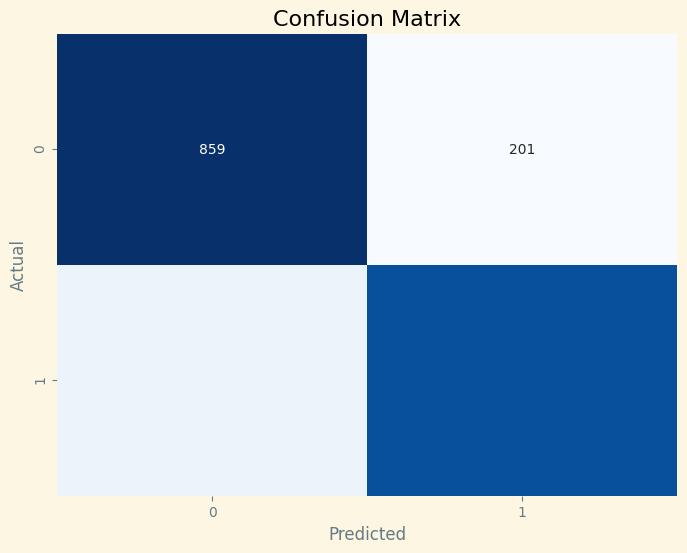

In [90]:
LR = LogisticRegression(C=0.1, penalty="l1", solver="liblinear")
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Checking accuracy for RandomForestClassifier

In [91]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'gini'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'gini'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'gini'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'entropy'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'entropy'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'}
Test Accuracy: 0.9046242774566474


Accuracy: 0.9060693641618497
Confusion Matrix:
 [[954 106]
 [ 89 927]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1060
           1       0.90      0.91      0.90      1016

    accuracy                           0.91      2076
   macro avg       0.91      0.91      0.91      2076
weighted avg       0.91      0.91      0.91      2076



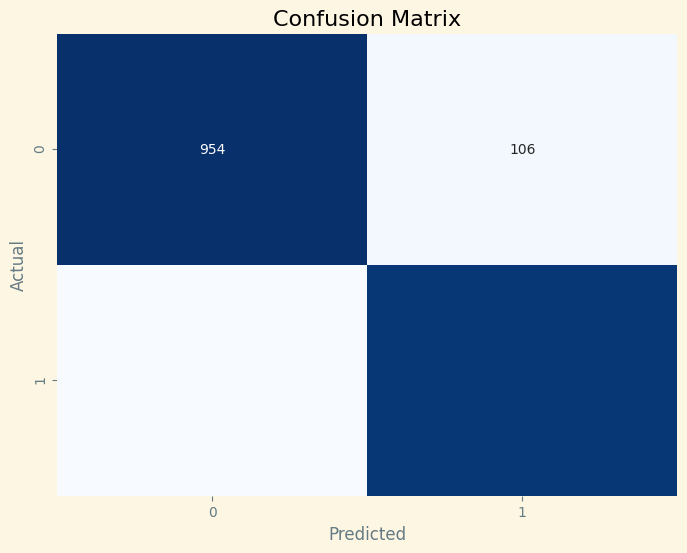

In [92]:
RFC = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=30)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

accuracy = accuracy_score(y_test, predRFC)
conf_matrix = confusion_matrix(y_test, predRFC)
class_report = classification_report(y_test, predRFC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Support vector classifier

Accuracy: 0.8959537572254336
Confusion Matrix:
 [[900 160]
 [ 56 960]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      1060
           1       0.86      0.94      0.90      1016

    accuracy                           0.90      2076
   macro avg       0.90      0.90      0.90      2076
weighted avg       0.90      0.90      0.90      2076



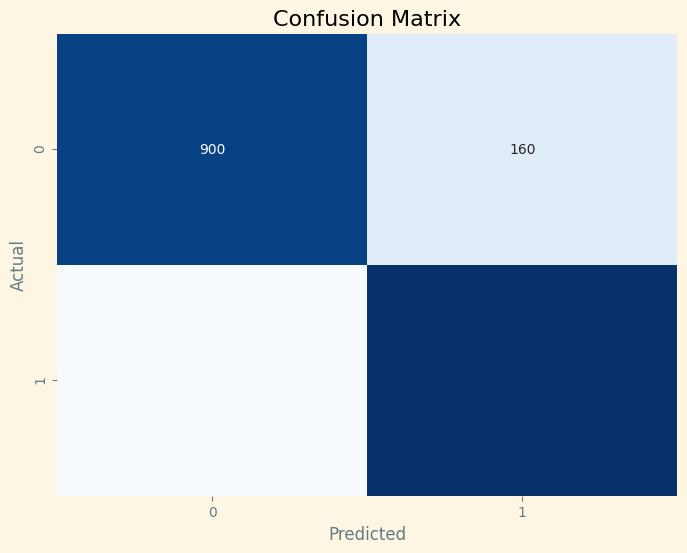

In [93]:
svc_rbf = SVC(kernel='rbf', gamma='auto', C=42)
svc_rbf.fit(x_train, y_train)

predsvc_rbf = svc_rbf.predict(x_test)

accuracy = accuracy_score(y_test, predsvc_rbf)
conf_matrix = confusion_matrix(y_test, predsvc_rbf)
class_report = classification_report(y_test, predsvc_rbf)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# DecisionTreeClassifier

In [95]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.8367052023121387


Accuracy: 0.8121387283236994
Confusion Matrix:
 [[847 213]
 [177 839]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1060
           1       0.80      0.83      0.81      1016

    accuracy                           0.81      2076
   macro avg       0.81      0.81      0.81      2076
weighted avg       0.81      0.81      0.81      2076



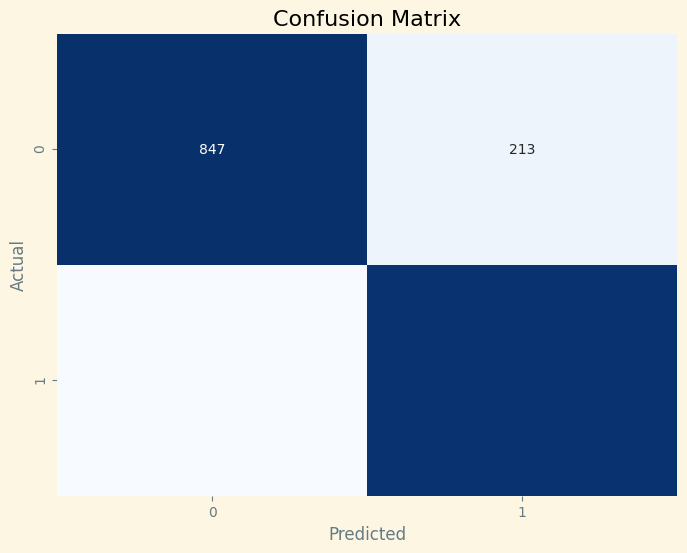

In [96]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=2, min_samples_leaf=2)
dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

acy = accuracy_score(y_test, pred_dtc)
cfmt = confusion_matrix(y_test, pred_dtc)
clfr = classification_report(y_test, pred_dtc)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier

In [98]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.9200385356454721


Accuracy: 0.9195568400770713
Confusion Matrix:
 [[959 101]
 [ 66 950]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      1060
           1       0.90      0.94      0.92      1016

    accuracy                           0.92      2076
   macro avg       0.92      0.92      0.92      2076
weighted avg       0.92      0.92      0.92      2076



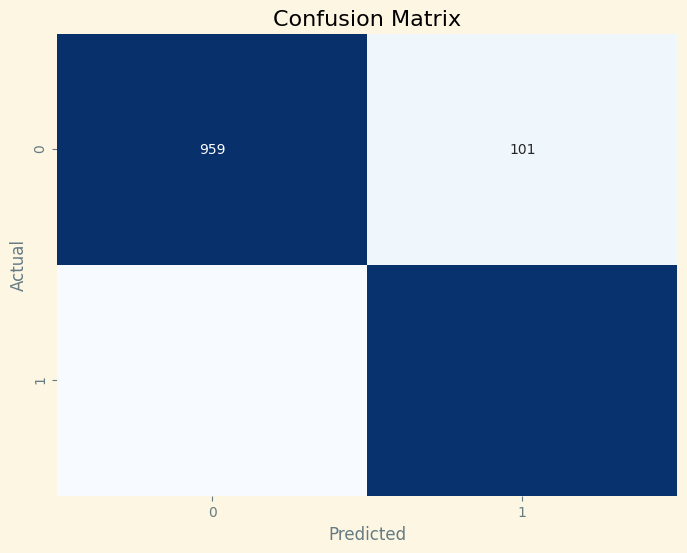

In [99]:
EXC = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
EXC.fit(x_train, y_train)

pred_EXC = EXC.predict(x_test)

acy = accuracy_score(y_test, pred_EXC)
cfmt = confusion_matrix(y_test, pred_EXC)
clfr = classification_report(y_test, pred_EXC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


 ## GradientBoostingClassifier

In [100]:
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 250, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    gb_classifier.fit(x_train, y_train)
    y_pred = gb_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4}
Test Accuracy: 0.8988439306358381


Accuracy: 0.8964354527938343
Confusion Matrix:
 [[973  87]
 [128 888]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1060
           1       0.91      0.87      0.89      1016

    accuracy                           0.90      2076
   macro avg       0.90      0.90      0.90      2076
weighted avg       0.90      0.90      0.90      2076



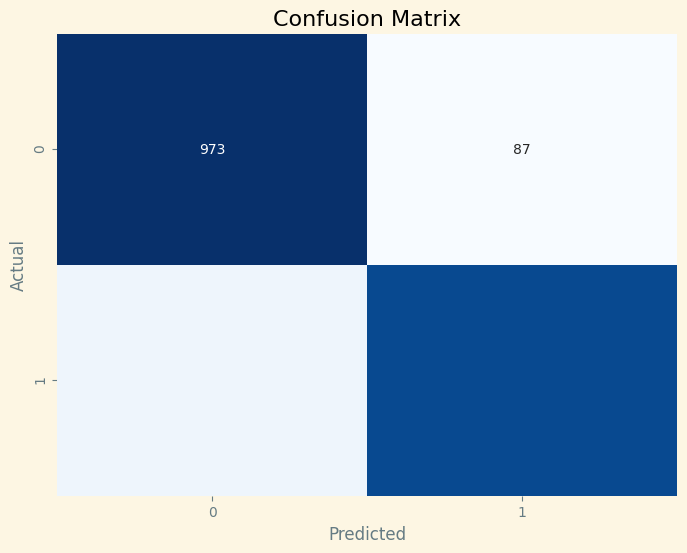

In [101]:
GBC = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=3)
GBC.fit(x_train, y_train)

pred_GBC = GBC.predict(x_test)

acy = accuracy_score(y_test, pred_GBC)
cfmt = confusion_matrix(y_test, pred_GBC)
clfr = classification_report(y_test, pred_GBC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## AdaBoostClassifier

In [102]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier = AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train)
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 50, 'learning_rate': 1.0}
Test Accuracy: 0.8333333333333334


Accuracy: 0.8333333333333334
Confusion Matrix:
 [[898 162]
 [184 832]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1060
           1       0.84      0.82      0.83      1016

    accuracy                           0.83      2076
   macro avg       0.83      0.83      0.83      2076
weighted avg       0.83      0.83      0.83      2076



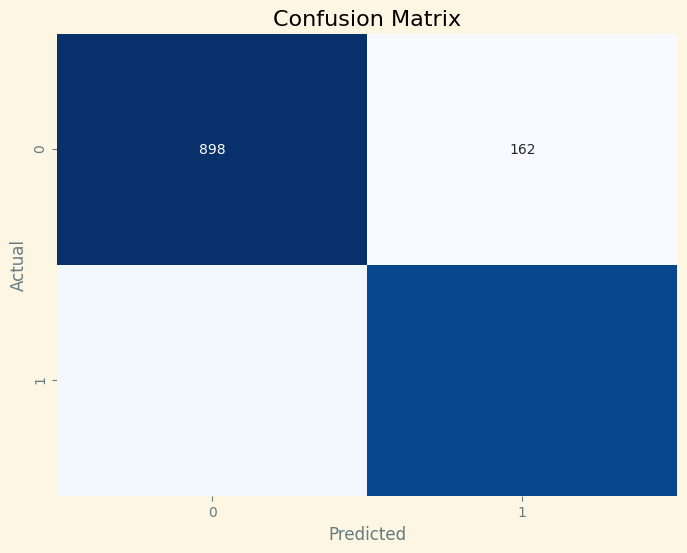

In [103]:
ABC = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ABC.fit(x_train, y_train)

pred_ABC = ABC.predict(x_test)

acy = accuracy_score(y_test, pred_ABC)
cfmt = confusion_matrix(y_test, pred_ABC)
clfr = classification_report(y_test, pred_ABC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## BaggingClassifier

In [104]:
param_combinations = [ {'n_estimators': 50, 'random_state': 42},
    {'n_estimators': 100, 'random_state': 42},
    {'n_estimators': 150, 'random_state': 42},
    {'n_estimators': 200, 'random_state': 42},
    {'n_estimators': 250, 'random_state': 42} ]

best_accuracy = 0
best_params = None

for params in param_combinations:
    bagging_clf = BaggingClassifier(**params)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 100, 'random_state': 42}
Test Accuracy: 0.899325626204239


Accuracy: 0.899325626204239
Confusion Matrix:
 [[948 112]
 [ 97 919]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1060
           1       0.89      0.90      0.90      1016

    accuracy                           0.90      2076
   macro avg       0.90      0.90      0.90      2076
weighted avg       0.90      0.90      0.90      2076



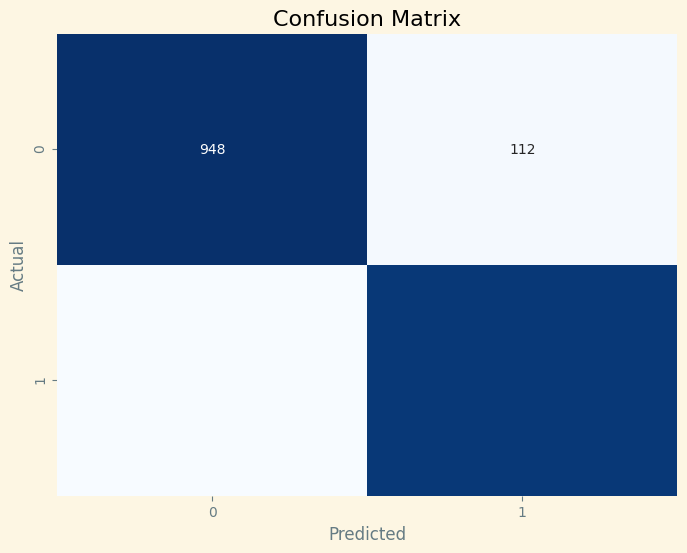

In [105]:
BC = BaggingClassifier(n_estimators=100, random_state=42)
BC.fit(x_train, y_train)

pred_BC = BC.predict(x_test)

acy = accuracy_score(y_test, pred_BC)
cfmt = confusion_matrix(y_test, pred_BC)
clfr = classification_report(y_test, pred_BC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier work better in classification model


## Cross Validation Score

In [106]:
score = cross_val_score(EXC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, pred_EXC) - score.mean())

[0.64980732 0.57466281 0.66088632 0.82129094 0.89210019]
0.7197495183044316
0.1998073217726397


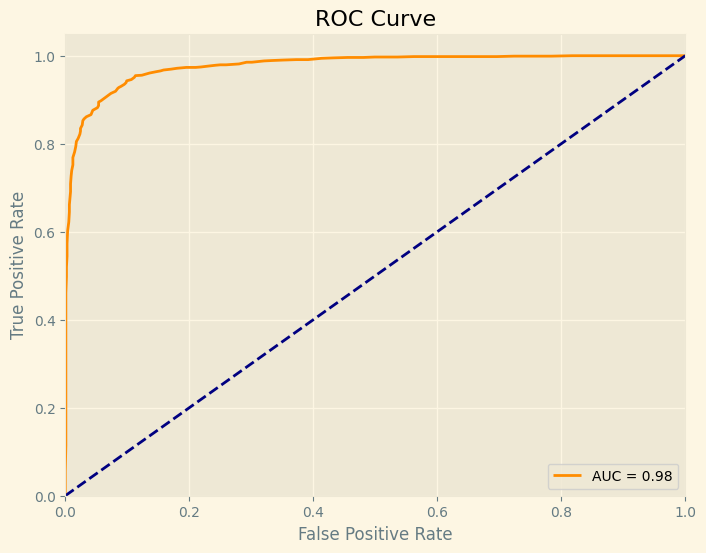

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score 

pred_probs = EXC.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs)
roc_auc = roc_auc_score(y_test, pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Auc gives 98%

In [109]:
values = pd.DataFrame({'Actual': y_test, 'Predicted': pred_EXC})
values.sample(10)

Actual  Predicted
8533       1          1
9036       1          1
2947       0          0
5662       0          0
1603       0          0
8179       1          1
5829       1          1
5501       0          0
3803       0          0
3220       0          0

Model gives almost correct prediction

In [110]:
import joblib
# Save the model as a objectfile

joblib.dump(EXC,'Rainfall_Weather_Forecasting_RainTomorrow')

['Rainfall_Weather_Forecasting_RainTomorrow']

In [112]:
model=joblib.load(open("Rainfall_Weather_Forecasting_RainTomorrow","rb"))
model

ExtraTreesClassifier()

## Now let us predict the Rainfall from our data using Regression Model

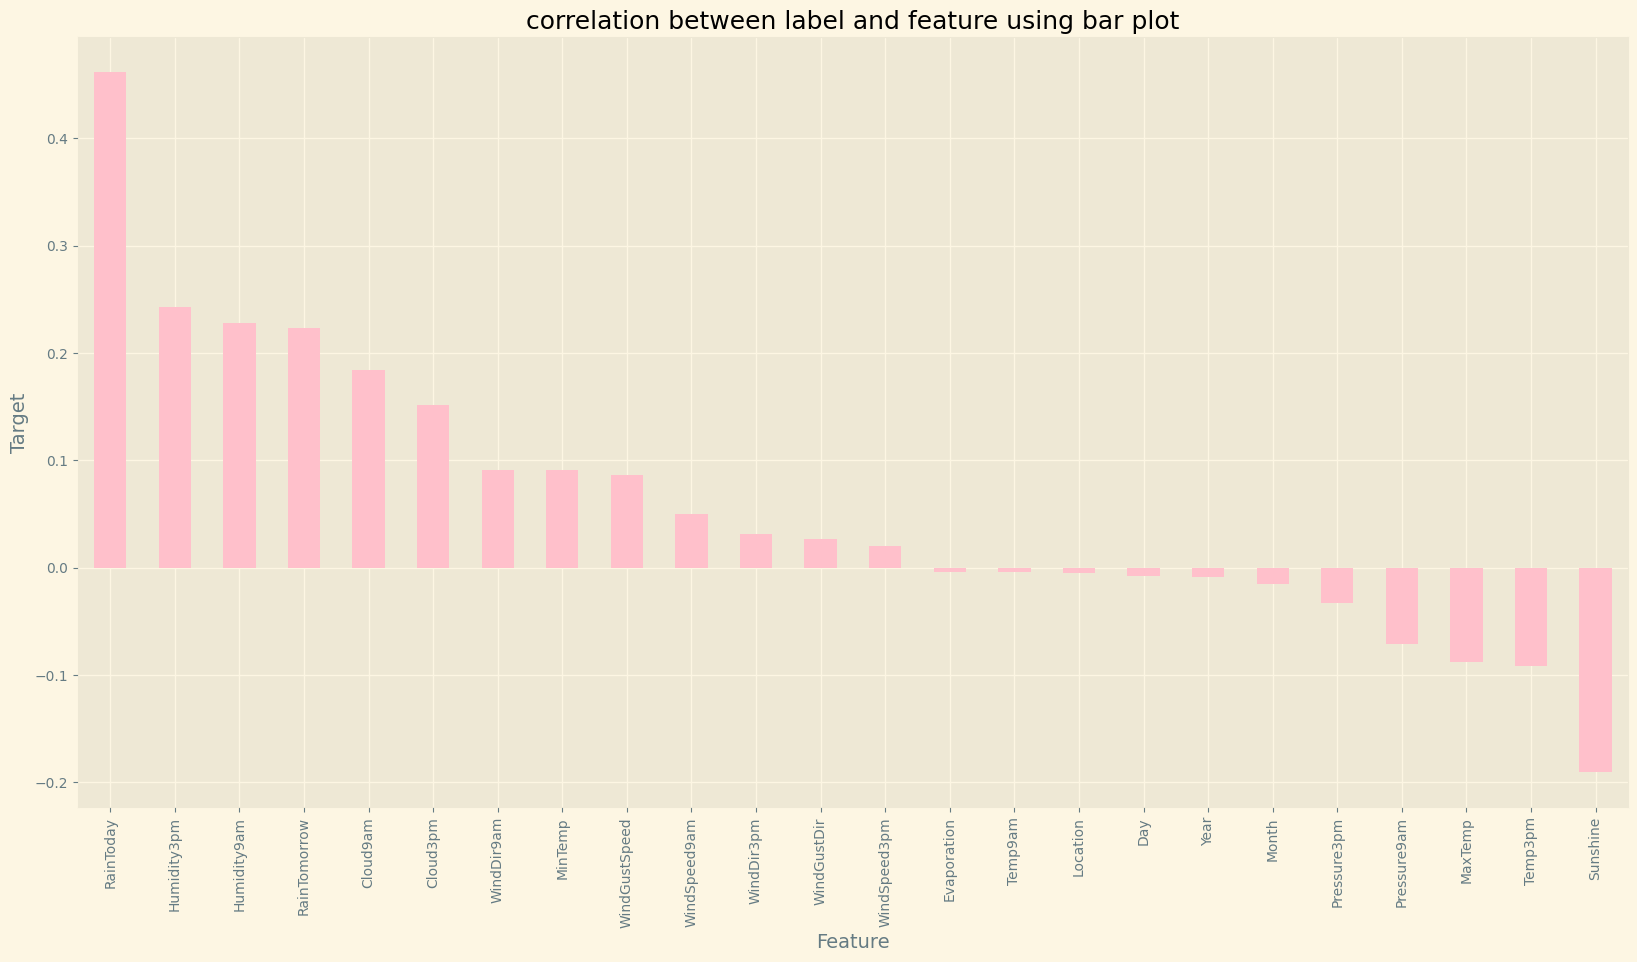

In [113]:
plt.figure(figsize=(20,10))
df_new.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='pink')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [114]:
X = df_new.drop("Rainfall", axis=1)
Y = df_new["Rainfall"]

## Feature Scaling using Standard Scalarization


In [115]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
0    -1.395097  0.052329 -0.194668     -0.11869  0.207361     1.220923   
1    -1.395097 -1.030652  0.164227     -0.11869  0.207361     1.412005   
2    -1.395097 -0.037920  0.262108     -0.11869  0.207361     1.603087   
3    -1.395097 -0.705758  0.637317     -0.11869  0.207361    -0.498814   
4    -1.395097  0.792365  1.338795     -0.11869  0.207361     1.220923   
...        ...       ...       ...          ...       ...          ...   
6757  1.186193 -1.860937 -0.113101     -0.11869  0.207361    -1.263141   
6758  1.186193 -1.716540  0.196854     -0.11869  0.207361    -0.116650   
6759  1.186193 -1.391646  0.457869     -0.11869  0.207361    -0.689895   
6760  1.186193 -0.958453  0.474183     -0.11869  0.207361     0.456596   
6761  1.186193  0.323074 -0.096788     -0.11869  0.207361    -1.263141   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure3pm  \
0          0.395568    1.315650    1.372365      0.739082  ...    -1.343353   
1          0.395568   -0.222688    1.595253     -0.895514  ...    -1.226045   
2          0.544900    1.315650    1.595253      0.636920  ...    -1.075221   
3         -1.097751    0.436600   -1.748064     -0.180378  ...    -0.388132   
4          0.171570   -1.321500   -0.187849     -0.589027  ...    -1.527694   
...             ...         ...         ...           ...  ...          ...   
6757      -0.575089    0.436600   -1.525176      0.023947  ...     0.868739   
6758      -1.247082    0.436600   -1.079401      0.023947  ...     0.667639   
6759      -0.127093    0.436600    1.372365     -0.384702  ...     0.282199   
6760      -0.799087    0.656363   -1.079401      0.023947  ...     0.231924   
6761      -0.127093   -1.101738   -1.302289      0.432596  ...     0.466540   

      Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  \
0     1.396453  0.208282 -0.174035 -0.150755  -0.550355     -0.550355   
1     0.192678  0.208282 -0.121606  0.267878  -0.550355     -0.550355   
2     0.192678 -1.072084  0.542498  0.083680  -0.550355     -0.550355   
3     0.192678  0.208282  0.035682  0.636275  -0.550355     -0.550355   
4     0.995194  1.488648 -0.016748  1.172125  -0.550355     -0.550355   
...        ...       ...       ...       ...        ...           ...   
6757  0.192678  0.208282 -1.362432 -0.050283  -0.550355     -0.550355   
6758  0.192678  0.208282 -1.222621  0.301369  -0.550355     -0.550355   
6759  0.192678  0.208282 -0.942998  0.569294  -0.550355     -0.550355   
6760 -0.609839 -1.072084 -0.488611  0.552548  -0.550355     -0.550355   
6761  1.396453  1.488648 -0.506087 -0.301463  -0.550355     -0.550355   

           Day     Month      Year  
0    -1.675969  1.639768 -1.761148  
1    -1.562245  1.639768 -1.761148  
2    -1.448521  1.639768 -1.761148  
3    -1.334798  1.639768 -1.761148  
4    -1.221074  1.639768 -1.761148  
...        ...       ...       ...  
6757  0.598504 -0.136841  2.150387  
6758  0.712227 -0.136841  2.150387  
6759  0.825951 -0.136841  2.150387  
6760  0.939675 -0.136841  2.150387  
6761  1.053398 -0.136841  2.150387  

[6762 rows x 24 columns]

## Checking VIF(Variance Inflation Factor) values

In [116]:
#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values       Features
0     1.625620       Location
1     8.956482        MinTemp
2    26.923428        MaxTemp
3     1.259245    Evaporation
4     1.720813       Sunshine
5     1.544255    WindGustDir
6     2.469937  WindGustSpeed
7     1.323025     WindDir9am
8     1.419071     WindDir3pm
9     2.120762   WindSpeed9am
10    1.946447   WindSpeed3pm
11    4.146540    Humidity9am
12    5.905898    Humidity3pm
13   20.792345    Pressure9am
14   20.016350    Pressure3pm
15    1.962397       Cloud9am
16    1.885689       Cloud3pm
17   18.012554        Temp9am
18   33.323869        Temp3pm
19    1.425046      RainToday
20    1.498887   RainTomorrow
21    1.004266            Day
22    1.148323          Month
23    1.573540           Year

In [117]:
columns_to_drop = ['Pressure9am', 'Temp9am', 'MaxTemp', 'Temp3pm']
X.drop(columns=columns_to_drop, inplace=True)

In [118]:
#Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values       Features
0     1.619695       Location
1     1.617802        MinTemp
2     1.249547    Evaporation
3     1.685322       Sunshine
4     1.528037    WindGustDir
5     2.397215  WindGustSpeed
6     1.263582     WindDir9am
7     1.327485     WindDir3pm
8     2.016858   WindSpeed9am
9     1.887063   WindSpeed3pm
10    2.548329    Humidity9am
11    2.347512    Humidity3pm
12    1.446242    Pressure3pm
13    1.880188       Cloud9am
14    1.862123       Cloud3pm
15    1.371557      RainToday
16    1.487635   RainTomorrow
17    1.002686            Day
18    1.119885          Month
19    1.568487           Year

Now we can proceed

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=43)


R-squared (R2): 0.2278676012331422
Mean Absolute Error (MAE): 2.3363932293158434
Mean Squared Error (MSE): 130.5005312827085
Root Mean Squared Error (RMSE): 11.423682912384626
Mean Squared Logarithmic Error (MSLE): 0.2217546027480206
Explained Variance Score (EVS): 0.22797407889750843
Median Absolute Error: 0.06350271481513779
Max Error: 342.446


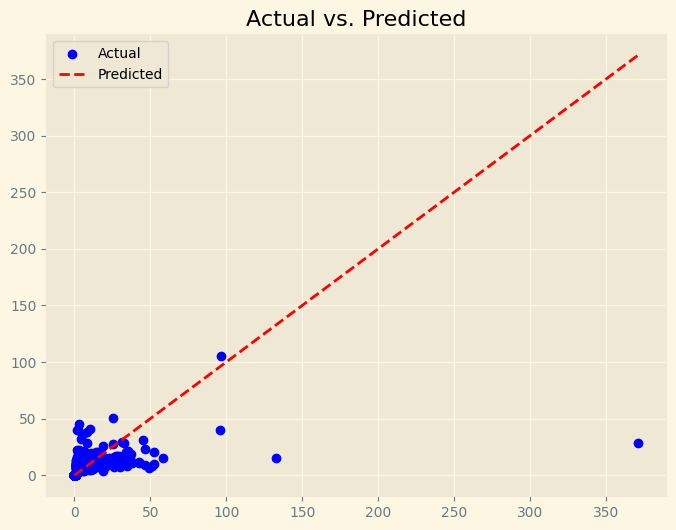

In [120]:
RFR = RandomForestRegressor(criterion='poisson', warm_start=True)
RFR.fit(X_train, Y_train)

pred_RFR = RFR.predict(X_test)

r2 = r2_score(Y_test, pred_RFR)
mae = mean_absolute_error(Y_test, pred_RFR)
mse = mean_squared_error(Y_test, pred_RFR)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(Y_test, pred_RFR)
evs = explained_variance_score(Y_test, pred_RFR)
median_err = median_absolute_error(Y_test, pred_RFR)
max_err = max_error(Y_test, pred_RFR)

print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Logarithmic Error (MSLE):', msle)
print('Explained Variance Score (EVS):', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_RFR, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--r', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

R-squared: 0.2645416028024602
Mean Absolute Error: 3.1104856035440176
Mean Squared Error: 140.80902484083444
Root Mean Squared Error: 11.866297857412583
Mean Absolute Percentage Error: 2983018700551797.5
Explained Variance Score: 0.16699434730118268
Median Absolute Error: 1.1574197780003237
Max Error: 356.94298978007566


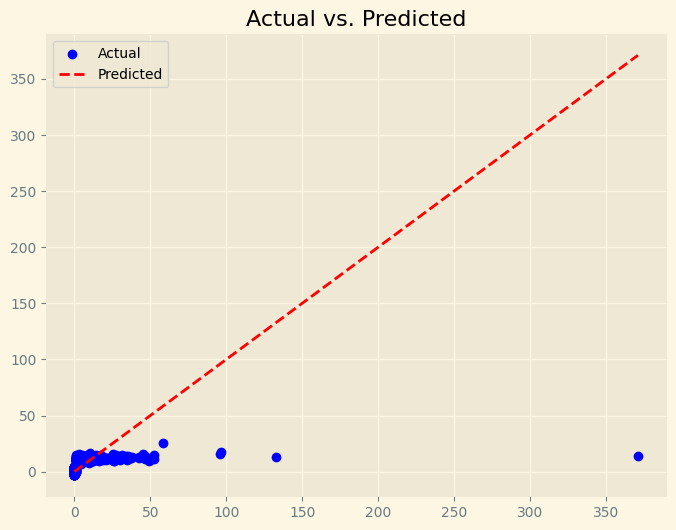

In [121]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
pred_LR = LR.predict(X_test)

r2 = LR.score(X_train, Y_train)
mae = mean_absolute_error(Y_test, pred_LR)
mse = mean_squared_error(Y_test, pred_LR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, pred_LR)
evs = explained_variance_score(Y_test, pred_LR)
median_err = median_absolute_error(Y_test, pred_LR)
max_err = max_error(Y_test, pred_LR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_LR, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--r', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

## KNeighborsRegressor

R-squared: 1.0
Mean Absolute Error: 2.3699645440086576
Mean Squared Error: 136.4388171113461
Root Mean Squared Error: 11.68070276615864
Mean Absolute Percentage Error: 587765656514439.0
Mean Squared Logarithmic Error: 0.3132665409063644
Explained Variance Score: 0.19302860113546827
Median Absolute Error: 0.07708678262771182
Max Error: 342.86109063575117


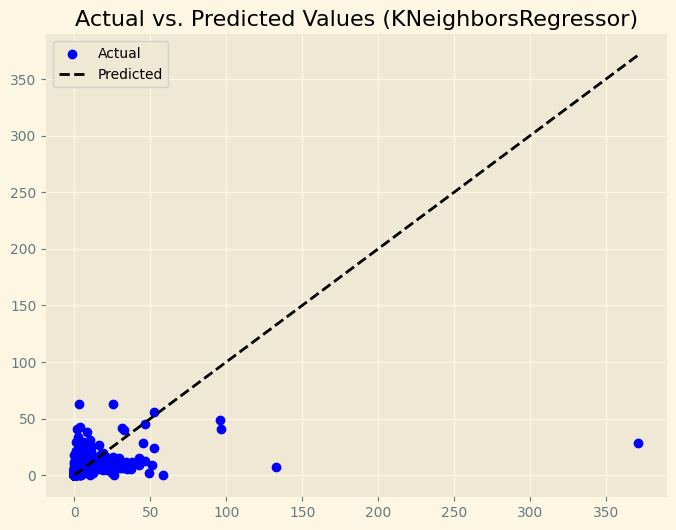

In [122]:
KNN = KNeighborsRegressor(n_neighbors=7, p=1, weights="distance")
KNN.fit(X_train, Y_train)
pred_KNN = KNN.predict(X_test)

r2 = KNN.score(X_train, Y_train)
mae = mean_absolute_error(Y_test, pred_KNN)
mse = mean_squared_error(Y_test, pred_KNN)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, pred_KNN)
msle = mean_squared_log_error(Y_test, pred_KNN)
evs = explained_variance_score(Y_test, pred_KNN)
median_err = median_absolute_error(Y_test, pred_KNN)
max_err = max_error(Y_test, pred_KNN)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_KNN, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values (KNeighborsRegressor)')
plt.legend()
plt.show()

## DecisionTreeRegressor

R-squared: 1.0
Mean Absolute Error: 3.0067257945306727
Mean Squared Error: 210.0231559497413
Root Mean Squared Error: 14.49217568033666
Mean Absolute Percentage Error: 171423045683356.6
Mean Squared Logarithmic Error: 0.3366357454772825
Explained Variance Score: -0.24246399229167337
Median Absolute Error: 0.0
Max Error: 358.0


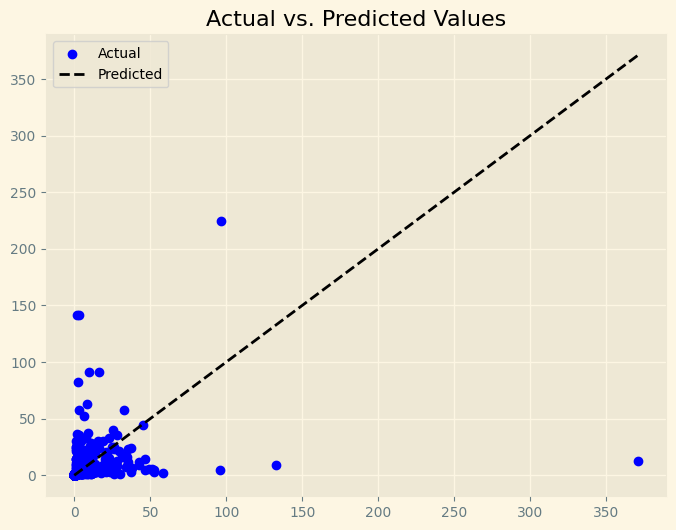

In [123]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train, Y_train)
pred_DTR = DTR.predict(X_test)

r2 = DTR.score(X_train, Y_train)
mae = mean_absolute_error(Y_test, pred_DTR)
mse = mean_squared_error(Y_test, pred_DTR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, pred_DTR)
msle = mean_squared_log_error(Y_test, pred_DTR)
evs = explained_variance_score(Y_test, pred_DTR)
median_err = median_absolute_error(Y_test, pred_DTR)
max_err = max_error(Y_test, pred_DTR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_DTR, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## Ridge

In [124]:
RR = Ridge(alpha=100)
RR.fit(X_train, Y_train)
pred_RR = RR.predict(X_test)

r2 = RR.score(X_train, Y_train)
mae = mean_absolute_error(Y_test, pred_RR)
mse = mean_squared_error(Y_test, pred_RR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, pred_RR)
evs = explained_variance_score(Y_test, pred_RR)
median_err = median_absolute_error(Y_test, pred_RR)
max_err = max_error(Y_test, pred_RR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.26446242333360415
Mean Absolute Error: 3.0966504609203787
Mean Squared Error: 140.87842787968495
Root Mean Squared Error: 11.869221873386854
Mean Absolute Percentage Error: 2976572676923615.0
Explained Variance Score: 0.16657970672591893
Median Absolute Error: 1.1551088260144433
Max Error: 357.0849196809282


## Lasso


In [125]:
L = Lasso()
L.fit(X_train, Y_train)
pred_L = L.predict(X_test)

print('R2_score', r2_score(Y_test, pred_L))
print('Mean absolute error:', mean_absolute_error(Y_test, pred_L))
print('Mean squared error:', mean_squared_error(Y_test, pred_L))
print("Root mean squared error:", np.sqrt(mean_squared_error(Y_test, pred_L)))

r2 = L.score(X_train, Y_train)
mae = mean_absolute_error(Y_test, pred_L)
mse = mean_squared_error(Y_test, pred_L)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, pred_L)
evs = explained_variance_score(Y_test, pred_L)
median_err = median_absolute_error(Y_test, pred_L)
max_err = max_error(Y_test, pred_L)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R2_score 0.13750061541927538
Mean absolute error: 2.632435014307763
Mean squared error: 145.7737404861568
Root mean squared error: 12.073679658089194
R-squared: 0.23442648269241484
Mean Absolute Error: 2.632435014307763
Mean Squared Error: 145.7737404861568
Root Mean Squared Error: 12.073679658089194
Mean Absolute Percentage Error: 1775747565190881.2
Explained Variance Score: 0.13754901695903066
Median Absolute Error: 0.596865210199133
Max Error: 361.2811512223916


## AdaBoostRegressor

R-squared: 0.42013174326260405
Mean Absolute Error: 2.82546257285832
Mean Squared Error: 143.93780799827368
Root Mean Squared Error: 11.997408386742267
Mean Absolute Percentage Error: 143208598391864.66
Mean Squared Logarithmic Error: 0.3091265496368603
Explained Variance Score: 0.15204506162662035
Median Absolute Error: 0.038879220327184195
Max Error: 356.45912806539513


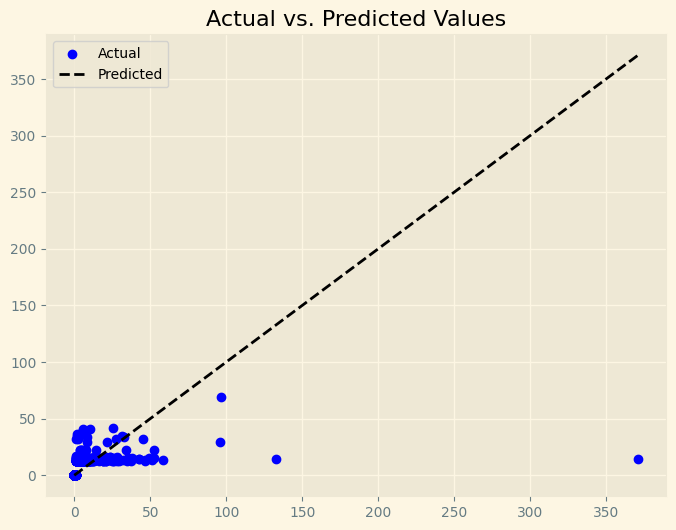

In [126]:
abr = AdaBoostRegressor(learning_rate=0.1, n_estimators=40)
abr.fit(X_train, Y_train)
pred_abr = abr.predict(X_test)

r2 = abr.score(X_train, Y_train)
mae = mean_absolute_error(Y_test, pred_abr)
mse = mean_squared_error(Y_test, pred_abr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, pred_abr)
msle = mean_squared_log_error(Y_test, pred_abr)
evs = explained_variance_score(Y_test, pred_abr)
median_err = median_absolute_error(Y_test, pred_abr)
max_err = max_error(Y_test, pred_abr)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_abr, c='blue', label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## DecisionTreeRegressor work better

In [127]:
values = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_DTR})
values.sample(10)

Actual  Predicted
5196     0.6        0.0
6722     0.0        0.0
2472     0.0        0.0
7548    32.2       16.0
7390     0.0        0.0
6785     0.0        0.0
2456     0.0        0.0
3288     0.2        0.0
306      3.2        1.2
6989     0.0        0.6

In [128]:
# Save the model as a objectfile
import joblib

joblib.dump(DTR,'Rainfall')

['Rainfall']

In [129]:
model_2=joblib.load(open("Rainfall","rb"))
model_2

DecisionTreeRegressor()